# Project 11: Working with Geocoded Data

## Building Maps in _geopandas_

In this lesson we will download COVID-19 data from data.world. We will normalize the data to compare spread between counties. Were we to simply plot the total number of cases or deaths by county, the results would be biased as counties with larger populations would likely have more cases and more deaths. We will observe how the spread developed across the country, starting in the northeast, eventually making its way to other regions.

### Installing geopandas

Although there is a geopandas installation available using the *conda install* command in you command line shell, that package is incomplete for our purposes. We will need to install dependencies - in this order: *GDAL*,*Fiona*, and *Shapely* - for geopandas before installing geopandas. I have included the *.whl* files for each of these packages in the same folder is this notebook. Download the files and save them to your local folder. To install, use  the command:

> *pip install filename*


If you are using a mac, you may install the appropriate module by selecting the version.

> *pip install -v GDAL==3.1.4*

> *pip install -v Fiona==1.8.17*

> *pip install -v Shapely==1.7.1*

Finally, install geopandas:

> *pip install geopandas*

In [1]:
#conda install -c conda-forge geopandas

In [ ]:
#conda install conda=23.3.1

In [3]:
#!pip install GDAL
#!pip install Fiona
#!pip install Shapely

In [4]:
#!pip install datadotworld

In [5]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime

/Users/audrabuysse/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_96046/1877086143.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (ht

/Users/audrabuysse/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


<Axes: >

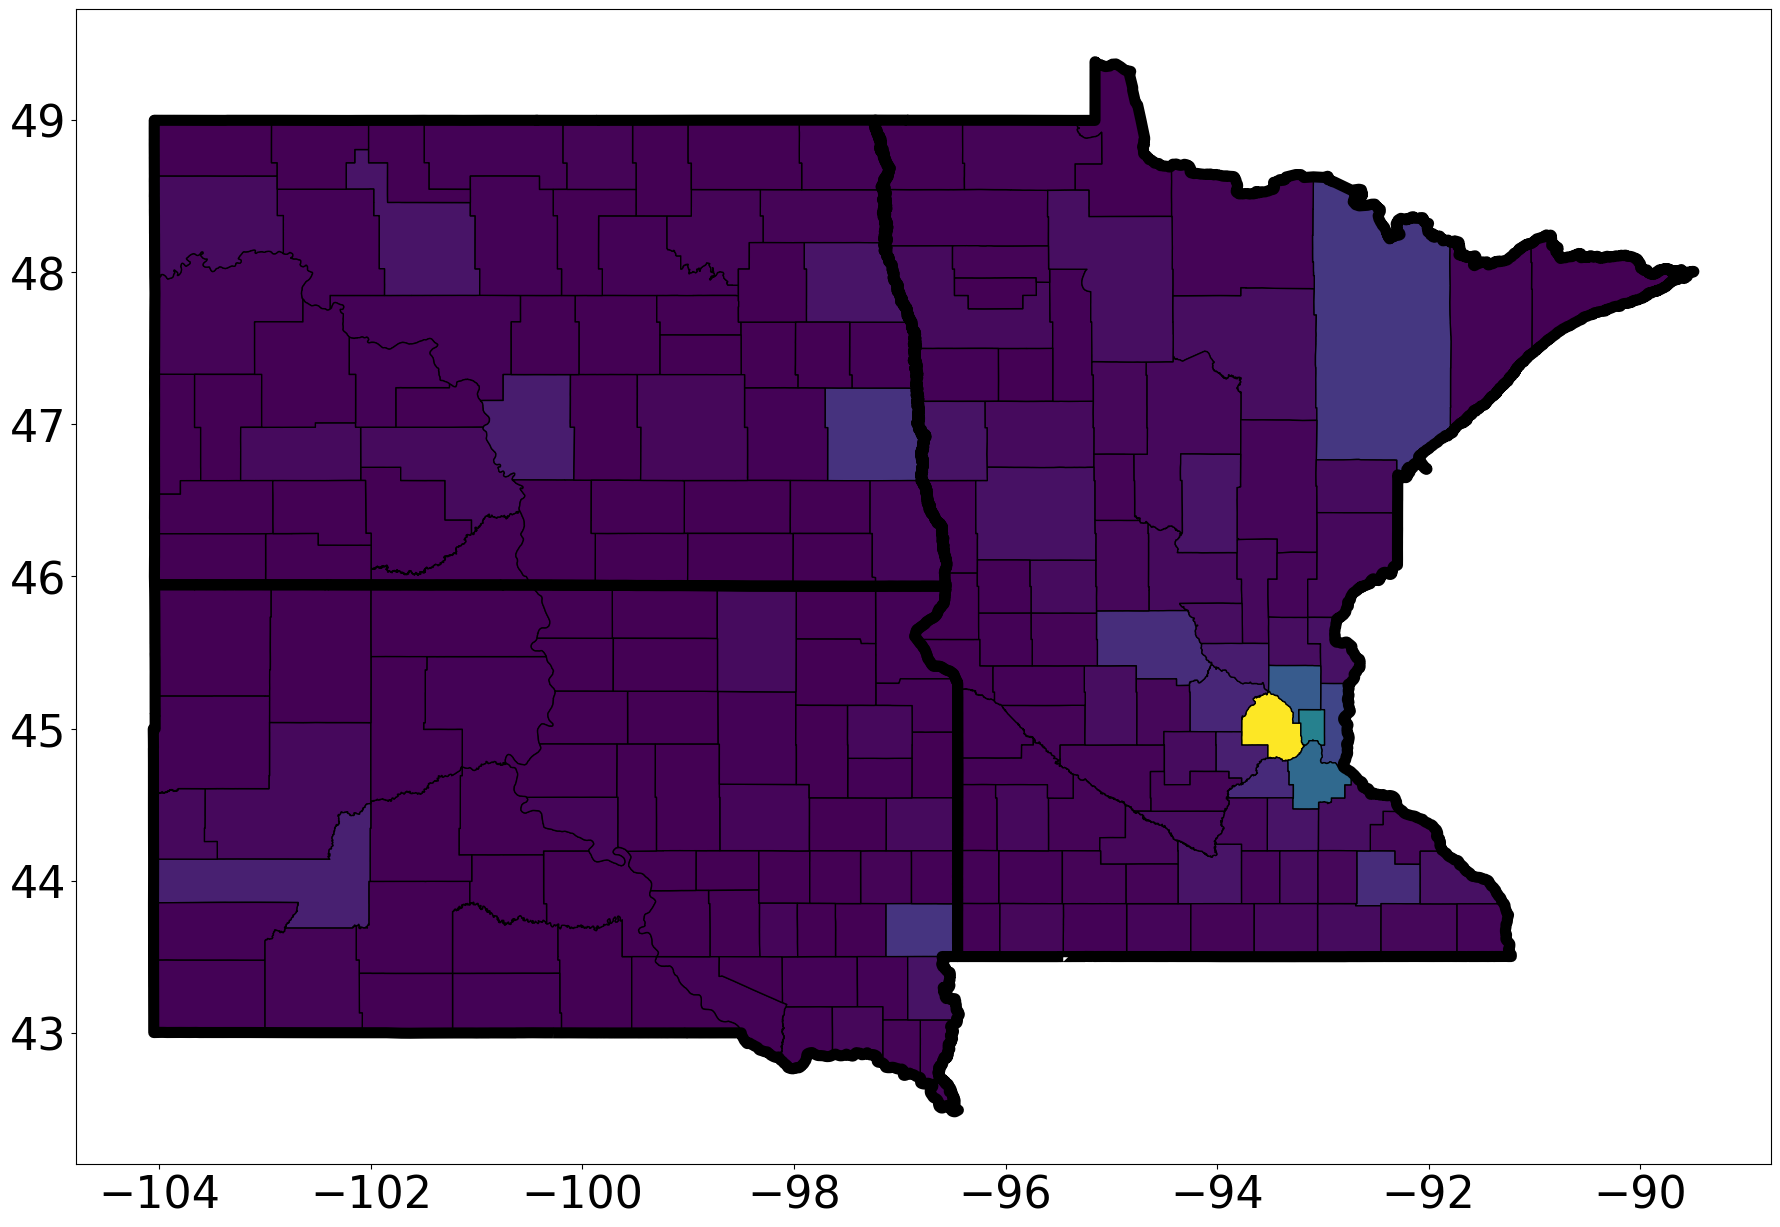

In [6]:
#def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
plt.rcParams.update({'font.size': 32})
filename = "countiesWithStatesAndPopulation.shp"
index_col = "FIPS"
map_data = geopandas.read_file(filename = filename).set_index(["State", 
                                                               "NAME"])
states = ["North Dakota", 
          "South Dakota", 
          "Minnesota"]
map_plot_data = map_data.loc[states]
state_df = map_plot_data.dissolve(by=["State"], aggfunc = "median")

fig, ax = plt.subplots(figsize = (30,15))
map_plot_data.plot(column = "Population", 
                   cmap = "viridis",
                   alpha = 1, 
                   edgecolor = "k",
                  ax = ax)
state_df.plot(color = "None", 
                  alpha = 1,
                  edgecolor = "k",
                  linewidth = 8,
                          ax = ax)

In [7]:
def import_geo_data(filename, FIPS_name = "FIPS"):
    map_data = geopandas.read_file(filename = filename).rename(
        columns = {"State":"state"})
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data
map_data = import_geo_data(filename = filename, FIPS_name = index_col)
map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD       ALAND  \
FIPS                                                                            
21007       21      007  00516850  0500000US21007    Ballard   06   639387454   
21017       21      017  00516855  0500000US21017    Bourbon   06   750439351   
21031       21      031  00516862  0500000US21031     Butler   06  1103571974   
21065       21      065  00516879  0500000US21065     Estill   06   655509930   
21069       21      069  00516881  0500000US21069    Fleming   06   902727151   
...        ...      ...       ...             ...        ...  ...         ...   
31073       31      073  00835858  0500000US31073     Gosper   06  1186616237   
39075       39      075  01074050  0500000US39075     Holmes   06  1094405866   
48171       48      171  01383871  0500000US48171  Gillespie   06  2740719114   
55079       55      079  01581100  0500000US55079  Milwaukee   06   625440563   
26139       26      139  01623012  0500000US26139     Ottawa   06  1459502408   

           AWATER  Population      state  \
FIPS                                       
21007    69473325      7888.0   Kentucky   
21017     4829777     19788.0   Kentucky   
21031    13943044     12879.0   Kentucky   
21065     6516335     14106.0   Kentucky   
21069     7182793     14581.0   Kentucky   
...           ...         ...        ...   
31073    11831826      1990.0   Nebraska   
39075     3695230     43960.0       Ohio   
48171     9012764     26988.0      Texas   
55079  2455383635    945726.0  Wisconsin   
26139  2765830983    291830.0   Michigan   

                                                geometry  
FIPS                                                      
21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...  
...                                                  ...  
31073  POLYGON ((-100.09510 40.43866, -100.08937 40.4...  
39075  POLYGON ((-82.22066 40.66758, -82.19327 40.667...  
48171  POLYGON ((-99.30400 30.49983, -99.28234 30.499...  
55079  POLYGON ((-88.06959 42.86726, -88.06959 42.872...  
26139  POLYGON ((-86.26432 43.11830, -86.25103 43.118...  

[3142 rows x 11 columns]

<Axes: >

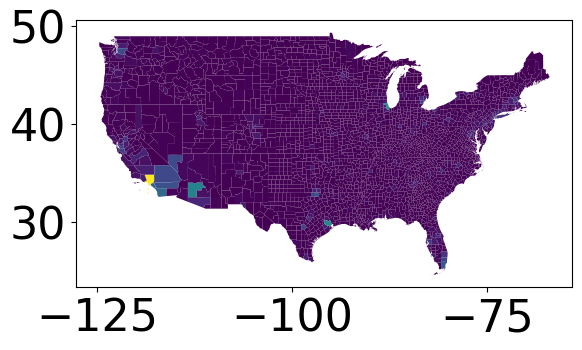

In [8]:
# plot only counties not in Hawaii or Alaska
map_data[~map_data["state"].isin(
    ["Hawaii", "Alaska"])].plot(column = "Population")

In [9]:
u_data = pd.read_csv("countyUnemploymentData.csv",
                    encoding = "latin1",
                    parse_dates = True,
                    index_col = ["date", "fips_code"])
u_data = u_data[list(u_data.keys())[-4:]]
u_data.dtypes

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_96046/1701343223.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  u_data = pd.read_csv("countyUnemploymentData.csv",


Labor Force          object
Employed             object
Unemployed           object
Unemployment Rate    object
dtype: object

In [10]:
for key in u_data.keys():
    u_data[key] = pd.to_numeric(u_data[key], errors = "coerce")
u_data.dtypes

Labor Force          float64
Employed             float64
Unemployed           float64
Unemployment Rate    float64
dtype: object

In [11]:
import copy as copy
def create_merged_geo_dataframe(data, map_data):
    data_frame_initialized = False
    matching_gpd = {}
    counties = data.groupby("fips_code").mean().index.unique()
    dates = data.groupby("date").mean().index.unique()
    for key, val in data.items():
        matching_gpd[key] = copy.copy(
            map_data[map_data.index.isin(counties)])
        for date in dates:
            val_slice = val.loc[date]
            val_slice.reset_index().set_index("fips_code")
            matching_gpd[key][date] = val_slice
    return matching_gpd
dates = u_data.groupby("date").mean().index.unique()
u_data = create_merged_geo_dataframe(u_data, map_data)

In [12]:
u_data["Unemployment Rate"]

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD       ALAND  \
FIPS                                                                            
21007       21      007  00516850  0500000US21007    Ballard   06   639387454   
21017       21      017  00516855  0500000US21017    Bourbon   06   750439351   
21031       21      031  00516862  0500000US21031     Butler   06  1103571974   
21065       21      065  00516879  0500000US21065     Estill   06   655509930   
21069       21      069  00516881  0500000US21069    Fleming   06   902727151   
...        ...      ...       ...             ...        ...  ...         ...   
31073       31      073  00835858  0500000US31073     Gosper   06  1186616237   
39075       39      075  01074050  0500000US39075     Holmes   06  1094405866   
48171       48      171  01383871  0500000US48171  Gillespie   06  2740719114   
55079       55      079  01581100  0500000US55079  Milwaukee   06   625440563   
26139       26      139  01623012  0500000US26139     Ottawa   06  1459502408   

           AWATER  Population      state  ... 2020-09-01 00:00:00  \
FIPS                                      ...                       
21007    69473325      7888.0   Kentucky  ...                 4.7   
21017     4829777     19788.0   Kentucky  ...                 4.2   
21031    13943044     12879.0   Kentucky  ...                 4.9   
21065     6516335     14106.0   Kentucky  ...                 5.6   
21069     7182793     14581.0   Kentucky  ...                 5.0   
...           ...         ...        ...  ...                 ...   
31073    11831826      1990.0   Nebraska  ...                 2.0   
39075     3695230     43960.0       Ohio  ...                 3.2   
48171     9012764     26988.0      Texas  ...                 4.5   
55079  2455383635    945726.0  Wisconsin  ...                 7.7   
26139  2765830983    291830.0   Michigan  ...                 4.6   

       2020-10-01 00:00:00  2020-11-01 00:00:00  2020-12-01 00:00:00  \
FIPS                                                                   
21007                  4.9                  5.2                  5.7   
21017                  3.8                  3.9                  4.4   
21031                  4.6                  4.6                  5.1   
21065                  5.3                  5.3                  6.0   
21069                  4.6                  4.7                  5.6   
...                    ...                  ...                  ...   
31073                  1.9                  1.8                  1.5   
39075                  2.0                  2.1                  2.6   
48171                  3.9                  3.9                  3.8   
55079                  6.7                  6.1                  5.6   
26139                  4.1                  4.4                  5.1   

       2021-01-01 00:00:00  2021-02-01 00:00:00  2021-03-01 00:00:00  \
FIPS                                                                   
21007                  5.3                  5.3                  5.5   
21017                  4.1                  4.1                  4.4   
21031                  5.1                  5.1                  4.9   
21065                  5.9                  5.7                  5.8   
21069                  5.6                  5.9                  5.5   
...                    ...                  ...                  ...   
31073                  1.7                  2.0                  1.8   
39075                  3.1                  3.1                  2.4   
48171                  4.4                  4.4                  4.3   
55079                  5.9                  6.2                  6.3   
26139                  4.8                  4.2                  4.3   

       2021-04-01 00:00:00  2021-05-01 00:00:00  2021-06-01 00:00:00  
FIPS                                                                  
21007                  4.0             

In [13]:
# matplotlib will give us warning because we are setting the value a slice
import warnings
warnings.filterwarnings("ignore")
# Normalize Unemployment Feb-20 == 1
key = "Unemployment Rate"
new_key = "Normalized " + key + " (Feb 2020)"
# df.copy() makes a copy of the dataframe
u_data[new_key] = u_data[key].copy()
# take the difference between the observed rate and the Feb rate
for date in dates:
    u_data[new_key][date] = u_data[key][date].sub(
        u_data[key][datetime.datetime(2020,2,1)])

In [14]:
u_data[new_key]

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD       ALAND  \
FIPS                                                                            
21007       21      007  00516850  0500000US21007    Ballard   06   639387454   
21017       21      017  00516855  0500000US21017    Bourbon   06   750439351   
21031       21      031  00516862  0500000US21031     Butler   06  1103571974   
21065       21      065  00516879  0500000US21065     Estill   06   655509930   
21069       21      069  00516881  0500000US21069    Fleming   06   902727151   
...        ...      ...       ...             ...        ...  ...         ...   
31073       31      073  00835858  0500000US31073     Gosper   06  1186616237   
39075       39      075  01074050  0500000US39075     Holmes   06  1094405866   
48171       48      171  01383871  0500000US48171  Gillespie   06  2740719114   
55079       55      079  01581100  0500000US55079  Milwaukee   06   625440563   
26139       26      139  01623012  0500000US26139     Ottawa   06  1459502408   

           AWATER  Population      state  ... 2020-09-01 00:00:00  \
FIPS                                      ...                       
21007    69473325      7888.0   Kentucky  ...                -1.1   
21017     4829777     19788.0   Kentucky  ...                 0.2   
21031    13943044     12879.0   Kentucky  ...                -0.4   
21065     6516335     14106.0   Kentucky  ...                -0.1   
21069     7182793     14581.0   Kentucky  ...                -1.4   
...           ...         ...        ...  ...                 ...   
31073    11831826      1990.0   Nebraska  ...                -0.1   
39075     3695230     43960.0       Ohio  ...                -0.1   
48171     9012764     26988.0      Texas  ...                 1.9   
55079  2455383635    945726.0  Wisconsin  ...                 3.4   
26139  2765830983    291830.0   Michigan  ...                 2.3   

       2020-10-01 00:00:00  2020-11-01 00:00:00  2020-12-01 00:00:00  \
FIPS                                                                   
21007                 -0.9                 -0.6                 -0.1   
21017                 -0.2                 -0.1                  0.4   
21031                 -0.7                 -0.7                 -0.2   
21065                 -0.4                 -0.4                  0.3   
21069                 -1.8                 -1.7                 -0.8   
...                    ...                  ...                  ...   
31073                 -0.2                 -0.3                 -0.6   
39075                 -1.3                 -1.2                 -0.7   
48171                  1.3                  1.3                  1.2   
55079                  2.4                  1.8                  1.3   
26139                  1.8                  2.1                  2.8   

       2021-01-01 00:00:00  2021-02-01 00:00:00  2021-03-01 00:00:00  \
FIPS                                                                   
21007                 -0.5                 -0.5                 -0.3   
21017                  0.1                  0.1                  0.4   
21031                 -0.2                 -0.2                 -0.4   
21065                  0.2                  0.0                  0.1   
21069                 -0.8                 -0.5                 -0.9   
...                    ...                  ...                  ...   
31073                 -0.4                 -0.1                 -0.3   
39075                 -0.2                 -0.2                 -0.9   
48171                  1.8                  1.8                  1.7   
55079                  1.6                  1.9                  2.0   
26139                  2.5                  1.9                  2.0   

       2021-04-01 00:00:00  2021-05-01 00:00:00  2021-06-01 00:00:00  
FIPS                                                                  
21007                 -1.8             

Text(0.5, 1.0, '2021-06-01\nUnemployment Rate')

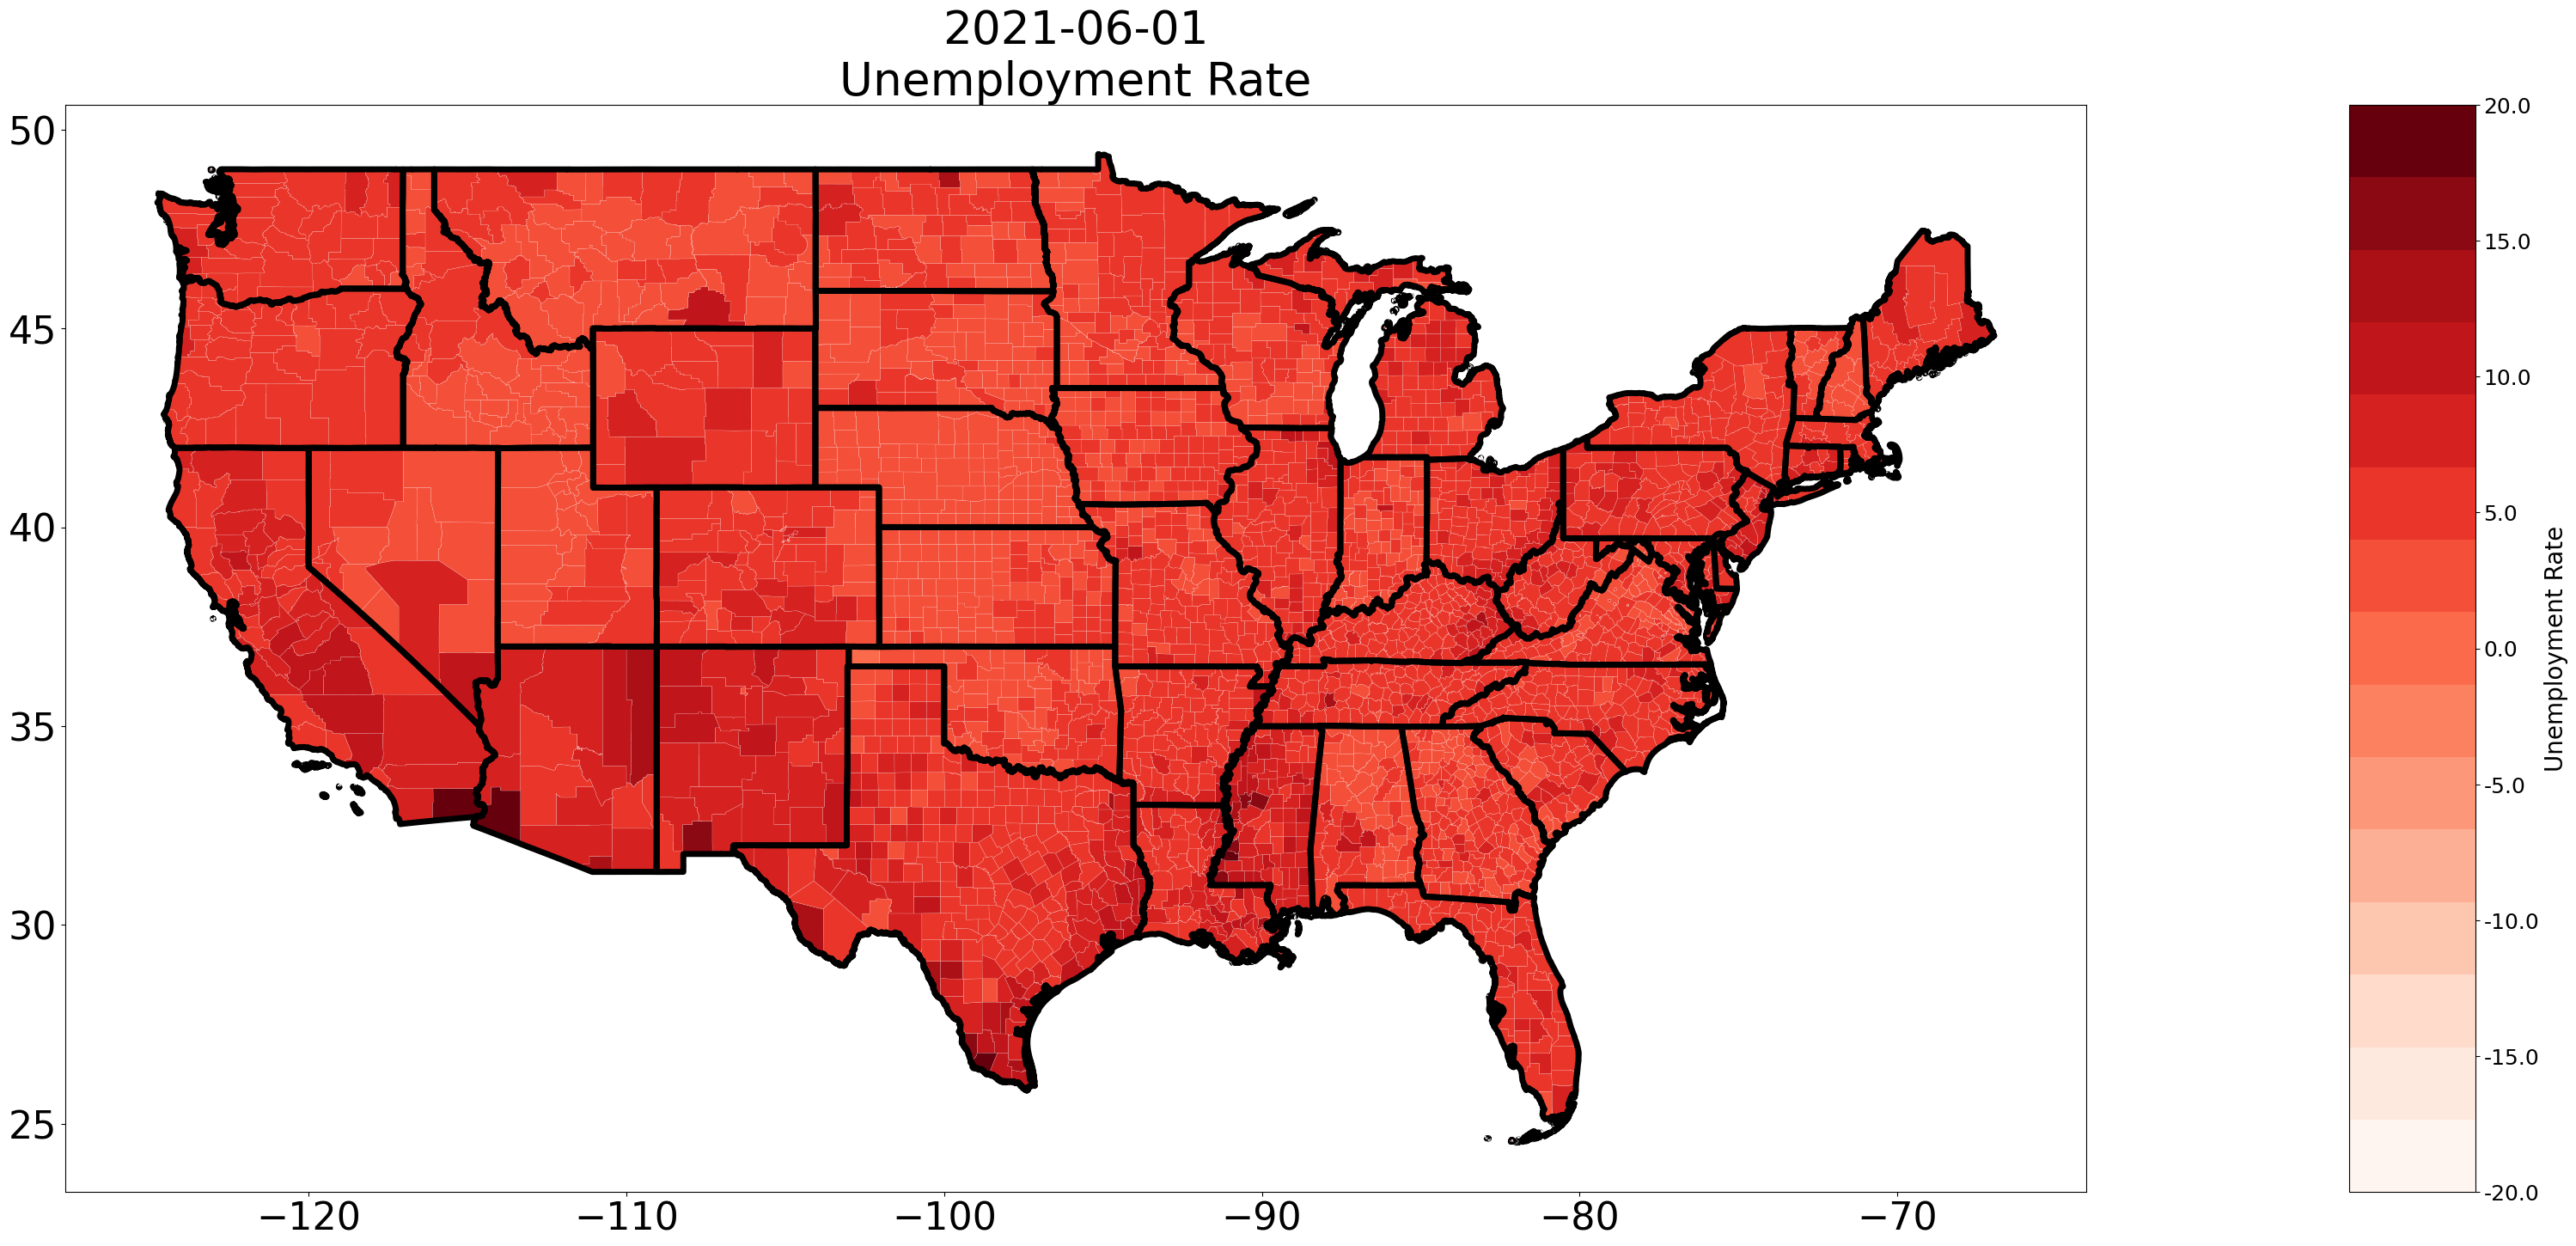

In [28]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

key = "Unemployment Rate"
plot_data = u_data[key].copy()
plot_data = plot_data[~plot_data["state"].isin(["Hawaii", "Alaska"])]
state_df = plot_data.dissolve(by=["state"], aggfunc = "median")
#for date in dates:
fig, ax = plt.subplots(figsize = (40,20))
    # dissolve performs groupby operation and aggregates geoids to the
    #  level grouped by
    
vmin = -20
vmax = 20
    # choose color bar format (which colors? how many divisions?)
cmap = cm.get_cmap("Reds", 15)
    # choose range of color bar values
norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
    # prepare space for colorbar on fig
divider = make_axes_locatable(ax)
size = "5%"
cax = divider.append_axes("right", 
                            size = size, 
                            pad = .1)
    # add colorbar to space in fig
cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
cbar.ax.tick_params(labelsize = 18)
vals = list(cbar.ax.get_yticks())
    # append max values from plot_df[dates] to vals for cbar
vals.append(plot_data[dates].max().max())
cbar.ax.set_yticklabels(vals)
cbar.ax.set_ylabel(key, fontsize = 20)
plot_data.plot(ax = ax, 
        cax = ax,
        column = date,
        cmap = cmap, legend = False,
        linewidth = .1, edgecolor = "white",
        norm = norm)
    
state_df.plot(color = "None", 
                alpha = 1,
                edgecolor = "k",
                linewidth = 5,
                ax = ax)
ax.set_title(str(date)[:10] + "\n" + key)

Text(0.5, 1.0, '2021-06-01\nNormalized Unemployment Rate (Feb 2020)')

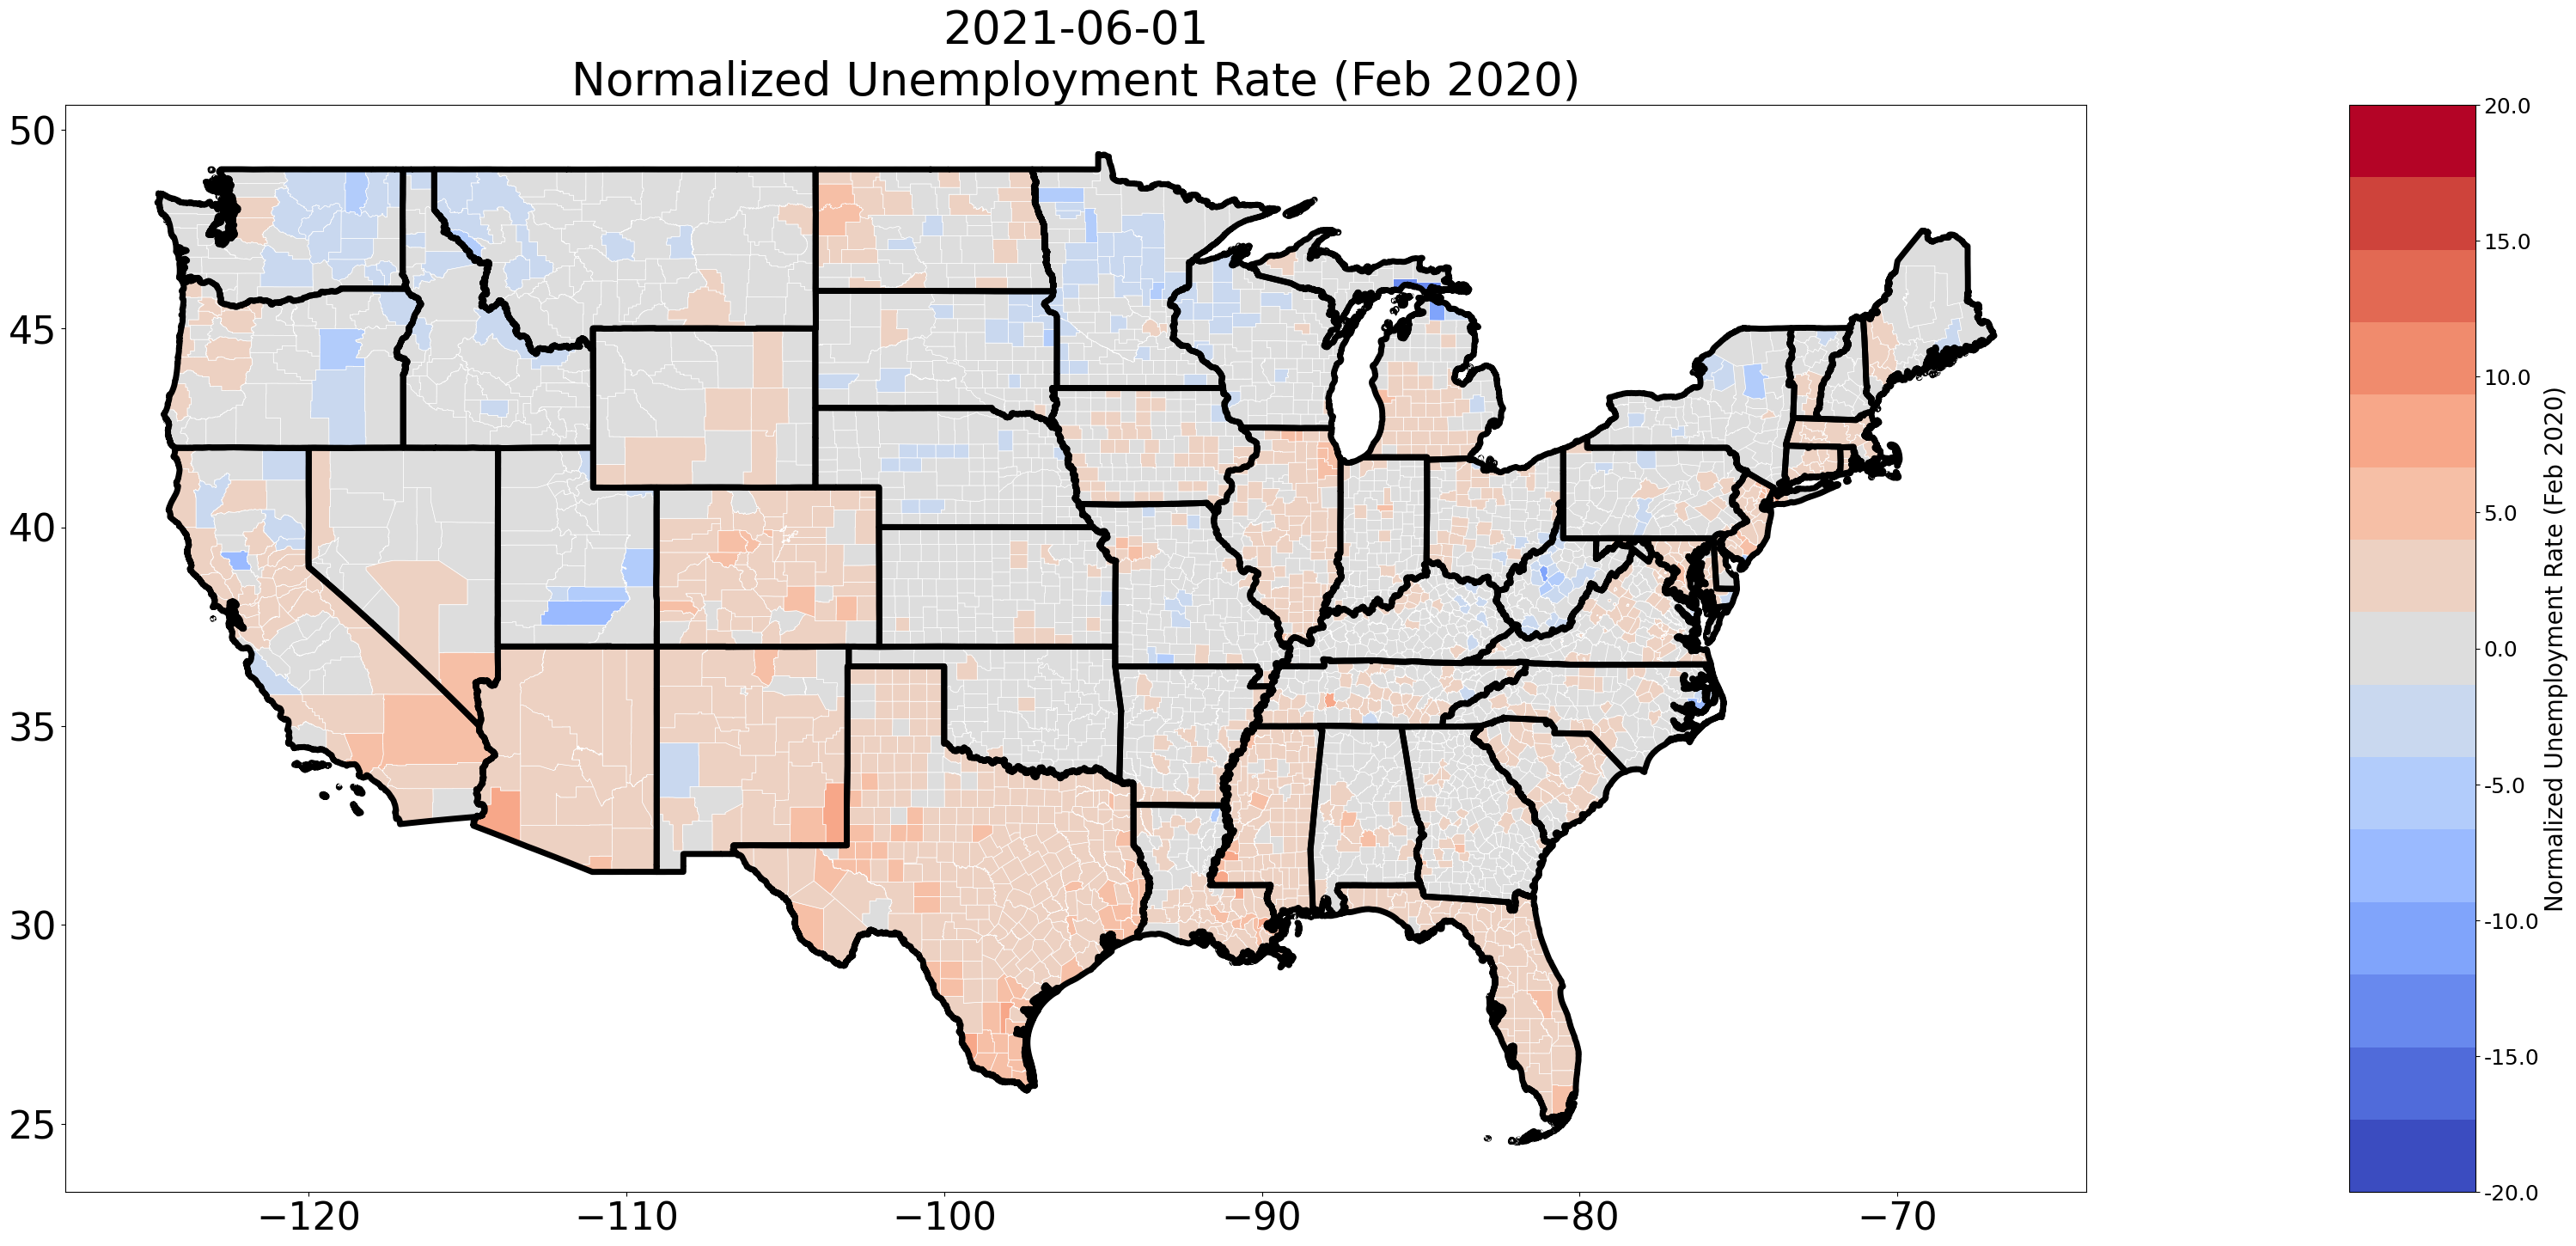

In [27]:
key = new_key
plot_data = u_data[key].copy()
plot_data = plot_data[~plot_data["state"].isin(["Hawaii", "Alaska"])]
state_df = plot_data.dissolve(by=["state"], aggfunc = "median")
#for date in dates:
fig, ax = plt.subplots(figsize = (40,20))
    # dissolve performs groupby operation and aggregates geoids to the
    #  level grouped by
    
vmin = -20
vmax = 20
    # choose color bar format (which colors? how many divisions?)
cmap = cm.get_cmap("coolwarm", 15)
    # choose range of color bar values
norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
    # prepare space for colorbar on fig
divider = make_axes_locatable(ax)
size = "5%"
cax = divider.append_axes("right", 
                            size = size, 
                            pad = .1)
    # add colorbar to space in fig
cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
cbar.ax.tick_params(labelsize = 18)
vals = list(cbar.ax.get_yticks())
    # append max values from plot_df[dates] to vals for cbar
vals.append(plot_data[dates].max().max())
cbar.ax.set_yticklabels(vals)
cbar.ax.set_ylabel(key, fontsize = 20)
plot_data.plot(ax = ax, 
        cax = ax,
        column = date,
        cmap = cmap, legend = False,
        linewidth = .5, edgecolor = "white",
        norm = norm)
    
state_df.plot(color = "None", 
                alpha = 1,
                edgecolor = "k",
                linewidth = 5,
                ax = ax)
ax.set_title(str(date)[:10] + "\n" + key)

# Create Interactive Map with Plotly

In [ ]:
import plotly.express as px
key = "Unemployment Rate"
plot_df = u_data[key]
plot_df = plot_df.to_crs(epsg=4326).rename(
    # transform dates to str because plotly will throw error
    # if datetime format passed as key
    columns = {date:str(date)[:10]for date in plot_df[dates].keys()})
cname = str(dates[-1])[:10]
plot_df[cname] = plot_df[cname].round(2)
hover_name = "NAME"
fig = px.choropleth_mapbox(plot_df.reset_index(),
                          geojson = plot_df,#.reset_index(),
                          locations = "FIPS",
                          hover_name = hover_name,
                           hover_data = [cname],
                          color = cname,
                           color_continuous_scale = "ylgnbu",
                          center = {"lat":plot_df["geometry"].centroid.y.mean(),
                                    "lon":plot_df["geometry"].centroid.x.mean()},
                          zoom = 4,
                          opacity = .6,
                          title = key,
                          mapbox_style = "carto-positron",
                          height = 900)
#fig.show()
fig.write_html(key+".html")

In [17]:
import os
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')).to_crs(epsg=4326)
world.set_index("iso_a3", inplace = True)
world

pop_est      continent                      name  gdp_md_est  \
iso_a3                                                                     
FJI        889953.0        Oceania                      Fiji        5496   
TZA      58005463.0         Africa                  Tanzania       63177   
ESH        603253.0         Africa                 W. Sahara         907   
CAN      37589262.0  North America                    Canada     1736425   
USA     328239523.0  North America  United States of America    21433226   
...             ...            ...                       ...         ...   
SRB       6944975.0         Europe                    Serbia       51475   
MNE        622137.0         Europe                Montenegro        5542   
-99       1794248.0         Europe                    Kosovo        7926   
TTO       1394973.0  North America       Trinidad and Tobago       24269   
SSD      11062113.0         Africa                  S. Sudan       11998   

                                                 geometry  
iso_a3                                                     
FJI     MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
TZA     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
ESH     POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
CAN     MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
USA     MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
...                                                   ...  
SRB     POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
MNE     POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
-99     POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
TTO     POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
SSD     POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 5 columns]

In [18]:
EFW = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3","Year"],
                  parse_dates = True).rename(columns = {"Summary":"EFW"})
EFW_keys = list(EFW.keys())[-7:]
EFW
#EFW_keys = ["EFW",
 #          "Size of Government",
  #         "Legal System and Property Rights",
   #        "Sound Money",
    #       "Freedom to Trade Internationally",
     #      "Regulation",
      #     "RGDP Per Capita"]

Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1971-01-01       NaN       NaN                 NaN   
           1972-01-01       NaN       NaN                 NaN   
           1973-01-01       NaN       NaN                 NaN   
           1974-01-01       NaN       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1971-01-01                               NaN          NaN   
           1972-01-01                               NaN          NaN   
           1973-01-01                               NaN          NaN   
           1974-01-01                               NaN          NaN   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        1970-01-01                               NaN         NaN   
           1971-01-01                               NaN         NaN   
           1972-01-01                               NaN         NaN   
           1973-01-01                               NaN         NaN   
           1974-01-01                               NaN         NaN   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  
ISO_Code_3 Year                         
AGO        1970-01-01              NaN  
           1971-01-01              NaN  
           1972-01-01              NaN  
           1973-01-01              NaN  
           1974-01-01              NaN  
...                                ...  
ZWE        2014-01-01         0.215452  
           2015-01-01         0.106888  
           2016-01-01         0.012463  
           2017-01-01        -0.013579  
           2018-01-01         0.004606  

[8085 rows x 8 columns]

In [19]:
# Create a dataframe that is only 2018
EFW_2018 = EFW[EFW.index.get_level_values(
    "Year") == "2018"].reset_index().set_index("ISO_Code_3")
for key in EFW_keys:
    world[key + " 2018"] = EFW_2018[key]
world

pop_est      continent                      name  gdp_md_est  \
iso_a3                                                                     
FJI        889953.0        Oceania                      Fiji        5496   
TZA      58005463.0         Africa                  Tanzania       63177   
ESH        603253.0         Africa                 W. Sahara         907   
CAN      37589262.0  North America                    Canada     1736425   
USA     328239523.0  North America  United States of America    21433226   
...             ...            ...                       ...         ...   
SRB       6944975.0         Europe                    Serbia       51475   
MNE        622137.0         Europe                Montenegro        5542   
-99       1794248.0         Europe                    Kosovo        7926   
TTO       1394973.0  North America       Trinidad and Tobago       24269   
SSD      11062113.0         Africa                  S. Sudan       11998   

                                                 geometry  EFW 2018  \
iso_a3                                                                
FJI     MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  6.180535   
TZA     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  6.649848   
ESH     POLYGON ((-8.66559 27.65643, -8.66512 27.58948...       NaN   
CAN     MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  8.109616   
USA     MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  8.279612   
...                                                   ...       ...   
SRB     POLYGON ((18.82982 45.90887, 18.82984 45.90888...  7.129546   
MNE     POLYGON ((20.07070 42.58863, 19.80161 42.50009...  7.450013   
-99     POLYGON ((20.59025 41.85541, 20.52295 42.21787...       NaN   
TTO     POLYGON ((-61.68000 10.76000, -61.10500 10.890...  7.259644   
SSD     POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...       NaN   

        Size of Government 2018  Legal System and Property Rights 2018  \
iso_a3                                                                   
FJI                    5.981744                               5.183652   
TZA                    6.505578                               5.311311   
ESH                         NaN                                    NaN   
CAN                    6.582435                               8.026669   
USA                    7.409095                               7.646530   
...                         ...                                    ...   
SRB                    6.820399                               5.452178   
MNE                    6.724992                               5.418196   
-99                         NaN                                    NaN   
TTO                    7.101423                               5.227772   
SSD                         NaN                                    NaN   

        Sound Money 2018  Freedom to Trade Internationally 2018  \
iso_a3                                                            
FJI             6.928075                               5.493766   
TZA             8.376938                               6.028092   
ESH                  NaN                                    NaN   
CAN             9.578479                               7.639533   
USA             9.772494                               7.783384   
...                  ...                                    ...   
SRB             8.333843                               7.783669   
MNE             9.456727                               8.500108   
-99                  NaN                                    NaN   
TTO             9.234746                               7.933485   
SSD                  NaN                                    NaN   

        Regulation 2018  RGDP Per Capita 2018  
iso_a3                                         
FJI            7.328106                   NaN  
TZA            7.034947              0.192306  
ESH                 NaN                   NaN  
CAN            8.724444 

In [20]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities')).to_crs(epsg=4326)
cities

name                     geometry
0      Vatican City    POINT (12.45339 41.90328)
1        San Marino    POINT (12.44177 43.93610)
2             Vaduz     POINT (9.51667 47.13372)
3           Lobamba   POINT (31.20000 -26.46667)
4        Luxembourg     POINT (6.13000 49.61166)
..              ...                          ...
238  Rio de Janeiro  POINT (-43.21212 -22.90731)
239       São Paulo  POINT (-46.62697 -23.55673)
240          Sydney  POINT (151.21255 -33.87137)
241       Singapore    POINT (103.85387 1.29498)
242       Hong Kong   POINT (114.18306 22.30693)

[243 rows x 2 columns]

In [21]:
# Only show cities that appear to be in a country
cities["Country"] = ""
#cities["Country"].iloc[0] = "ITA"
cities

name                     geometry Country
0      Vatican City    POINT (12.45339 41.90328)        
1        San Marino    POINT (12.44177 43.93610)        
2             Vaduz     POINT (9.51667 47.13372)        
3           Lobamba   POINT (31.20000 -26.46667)        
4        Luxembourg     POINT (6.13000 49.61166)        
..              ...                          ...     ...
238  Rio de Janeiro  POINT (-43.21212 -22.90731)        
239       São Paulo  POINT (-46.62697 -23.55673)        
240          Sydney  POINT (151.21255 -33.87137)        
241       Singapore    POINT (103.85387 1.29498)        
242       Hong Kong   POINT (114.18306 22.30693)        

[243 rows x 3 columns]

In [22]:
for ix in cities.index:
    try:
        # save the name of the country if the city falls within its boundaries
        cities.loc[ix, "Country"] = world[world["geometry"].contains(cities.loc[ix]["geometry"])].index[0]
    except:
        continue

In [23]:
cities[cities["Country"] != ""]

name                     geometry Country
0      Vatican City    POINT (12.45339 41.90328)     ITA
1        San Marino    POINT (12.44177 43.93610)     ITA
2             Vaduz     POINT (9.51667 47.13372)     AUT
3           Lobamba   POINT (31.20000 -26.46667)     SWZ
4        Luxembourg     POINT (6.13000 49.61166)     LUX
..              ...                          ...     ...
238  Rio de Janeiro  POINT (-43.21212 -22.90731)     BRA
239       São Paulo  POINT (-46.62697 -23.55673)     BRA
240          Sydney  POINT (151.21255 -33.87137)     AUS
241       Singapore    POINT (103.85387 1.29498)     MYS
242       Hong Kong   POINT (114.18306 22.30693)     CHN

[213 rows x 3 columns]

In [24]:
cities[cities["Country"] != ""]

name                     geometry Country
0      Vatican City    POINT (12.45339 41.90328)     ITA
1        San Marino    POINT (12.44177 43.93610)     ITA
2             Vaduz     POINT (9.51667 47.13372)     AUT
3           Lobamba   POINT (31.20000 -26.46667)     SWZ
4        Luxembourg     POINT (6.13000 49.61166)     LUX
..              ...                          ...     ...
238  Rio de Janeiro  POINT (-43.21212 -22.90731)     BRA
239       São Paulo  POINT (-46.62697 -23.55673)     BRA
240          Sydney  POINT (151.21255 -33.87137)     AUS
241       Singapore    POINT (103.85387 1.29498)     MYS
242       Hong Kong   POINT (114.18306 22.30693)     CHN

[213 rows x 3 columns]

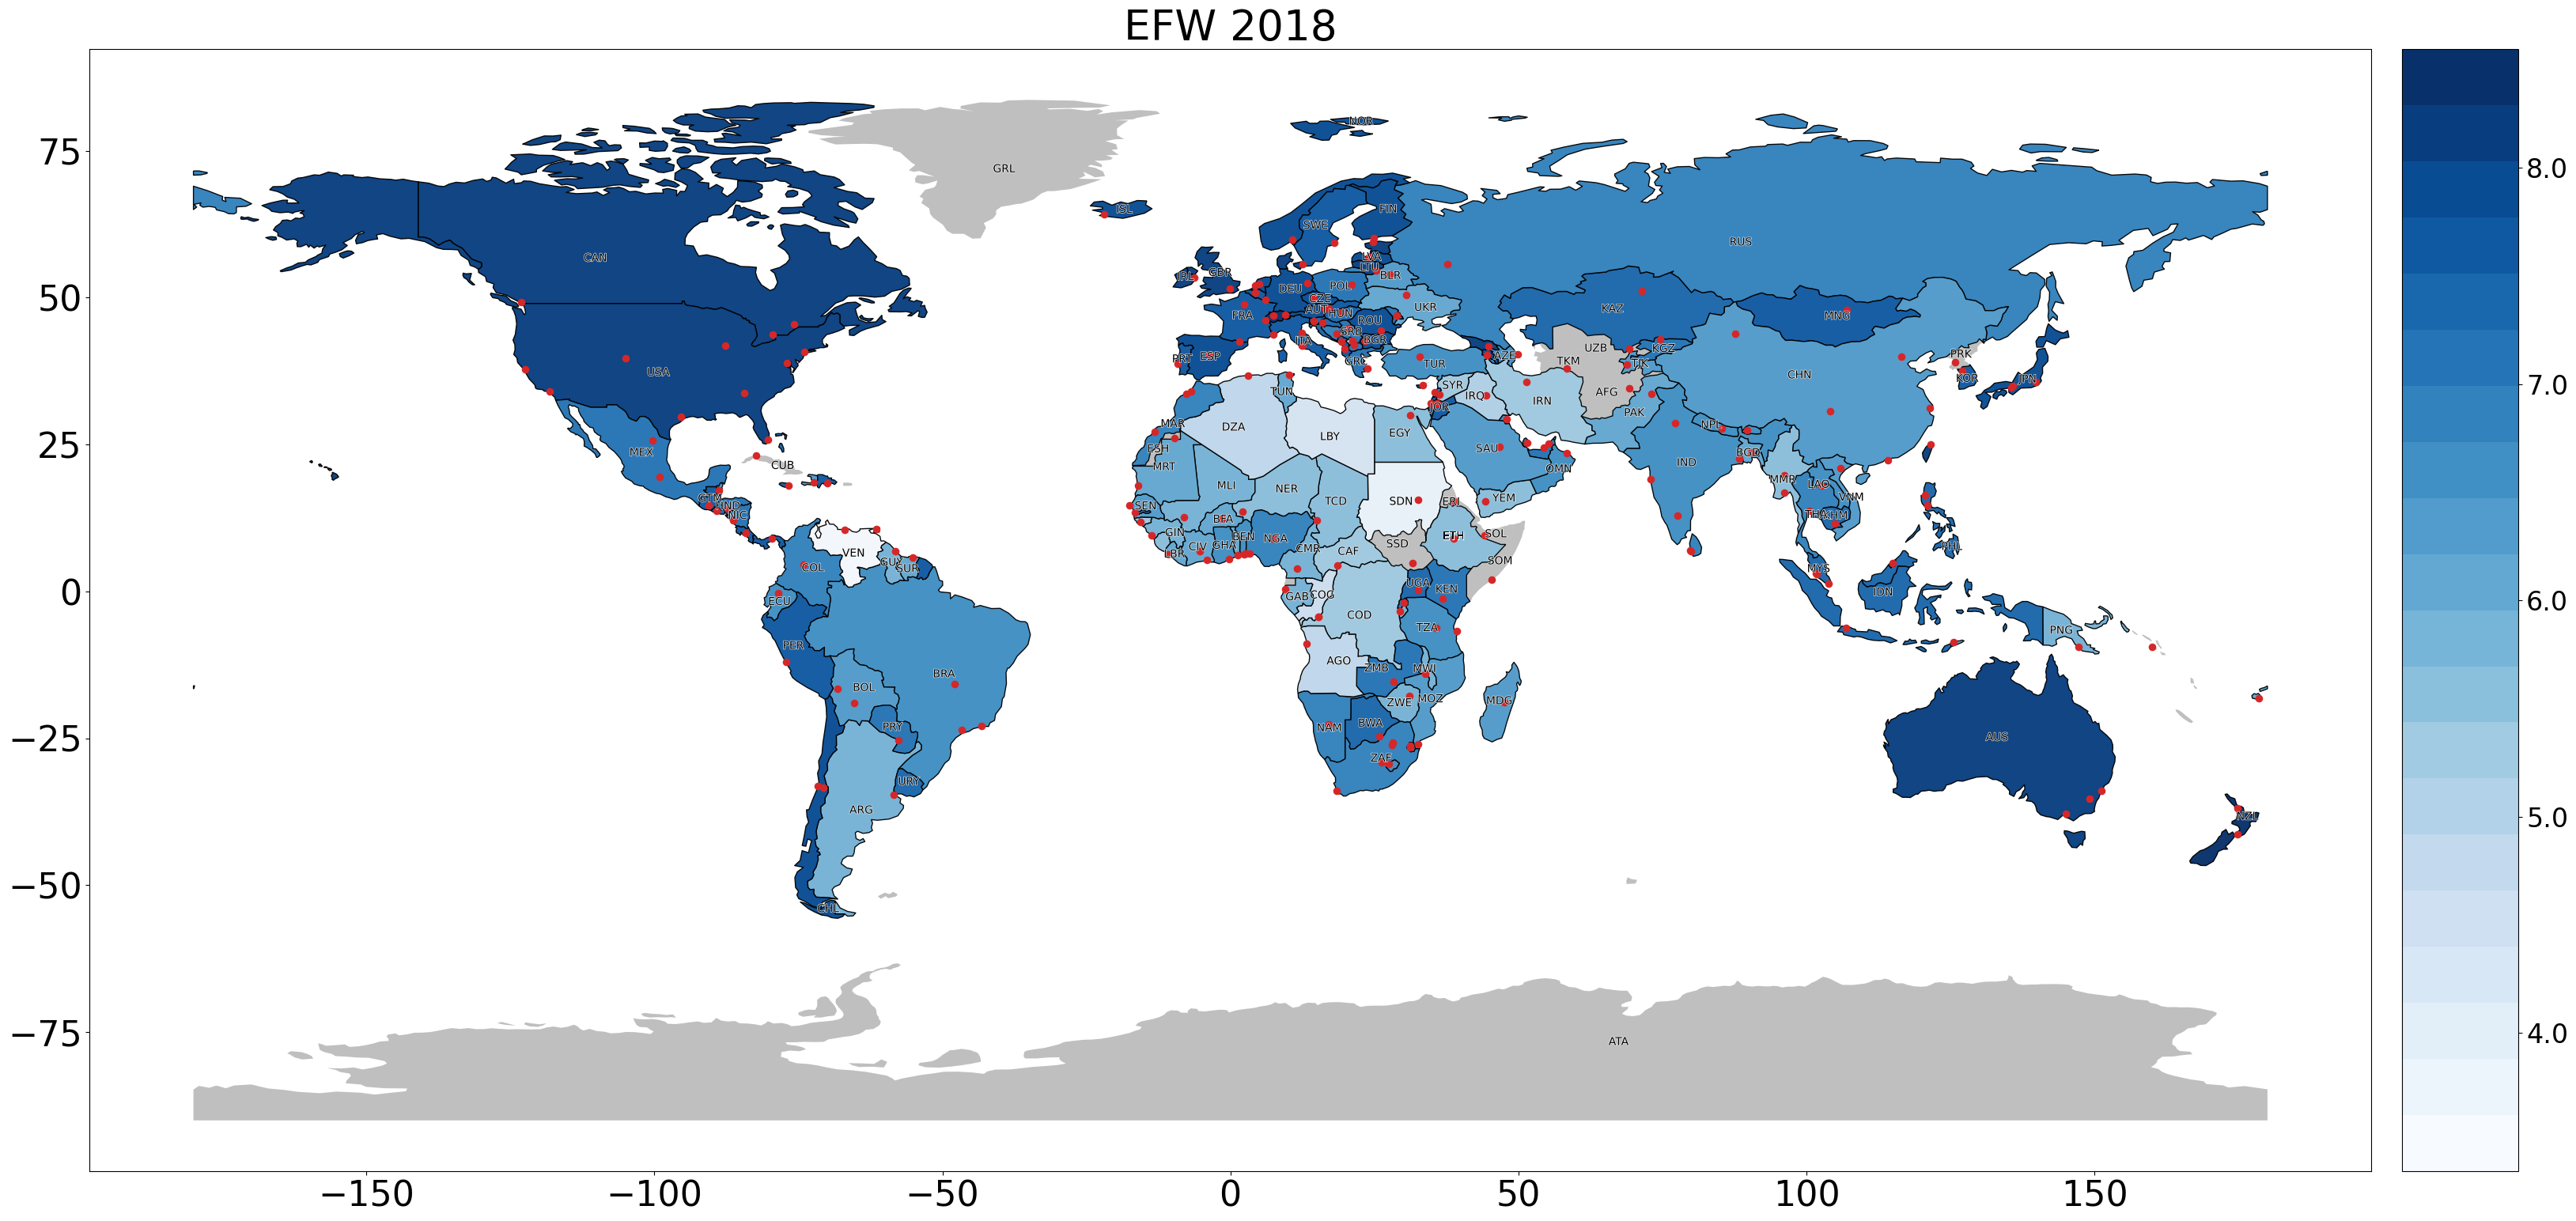

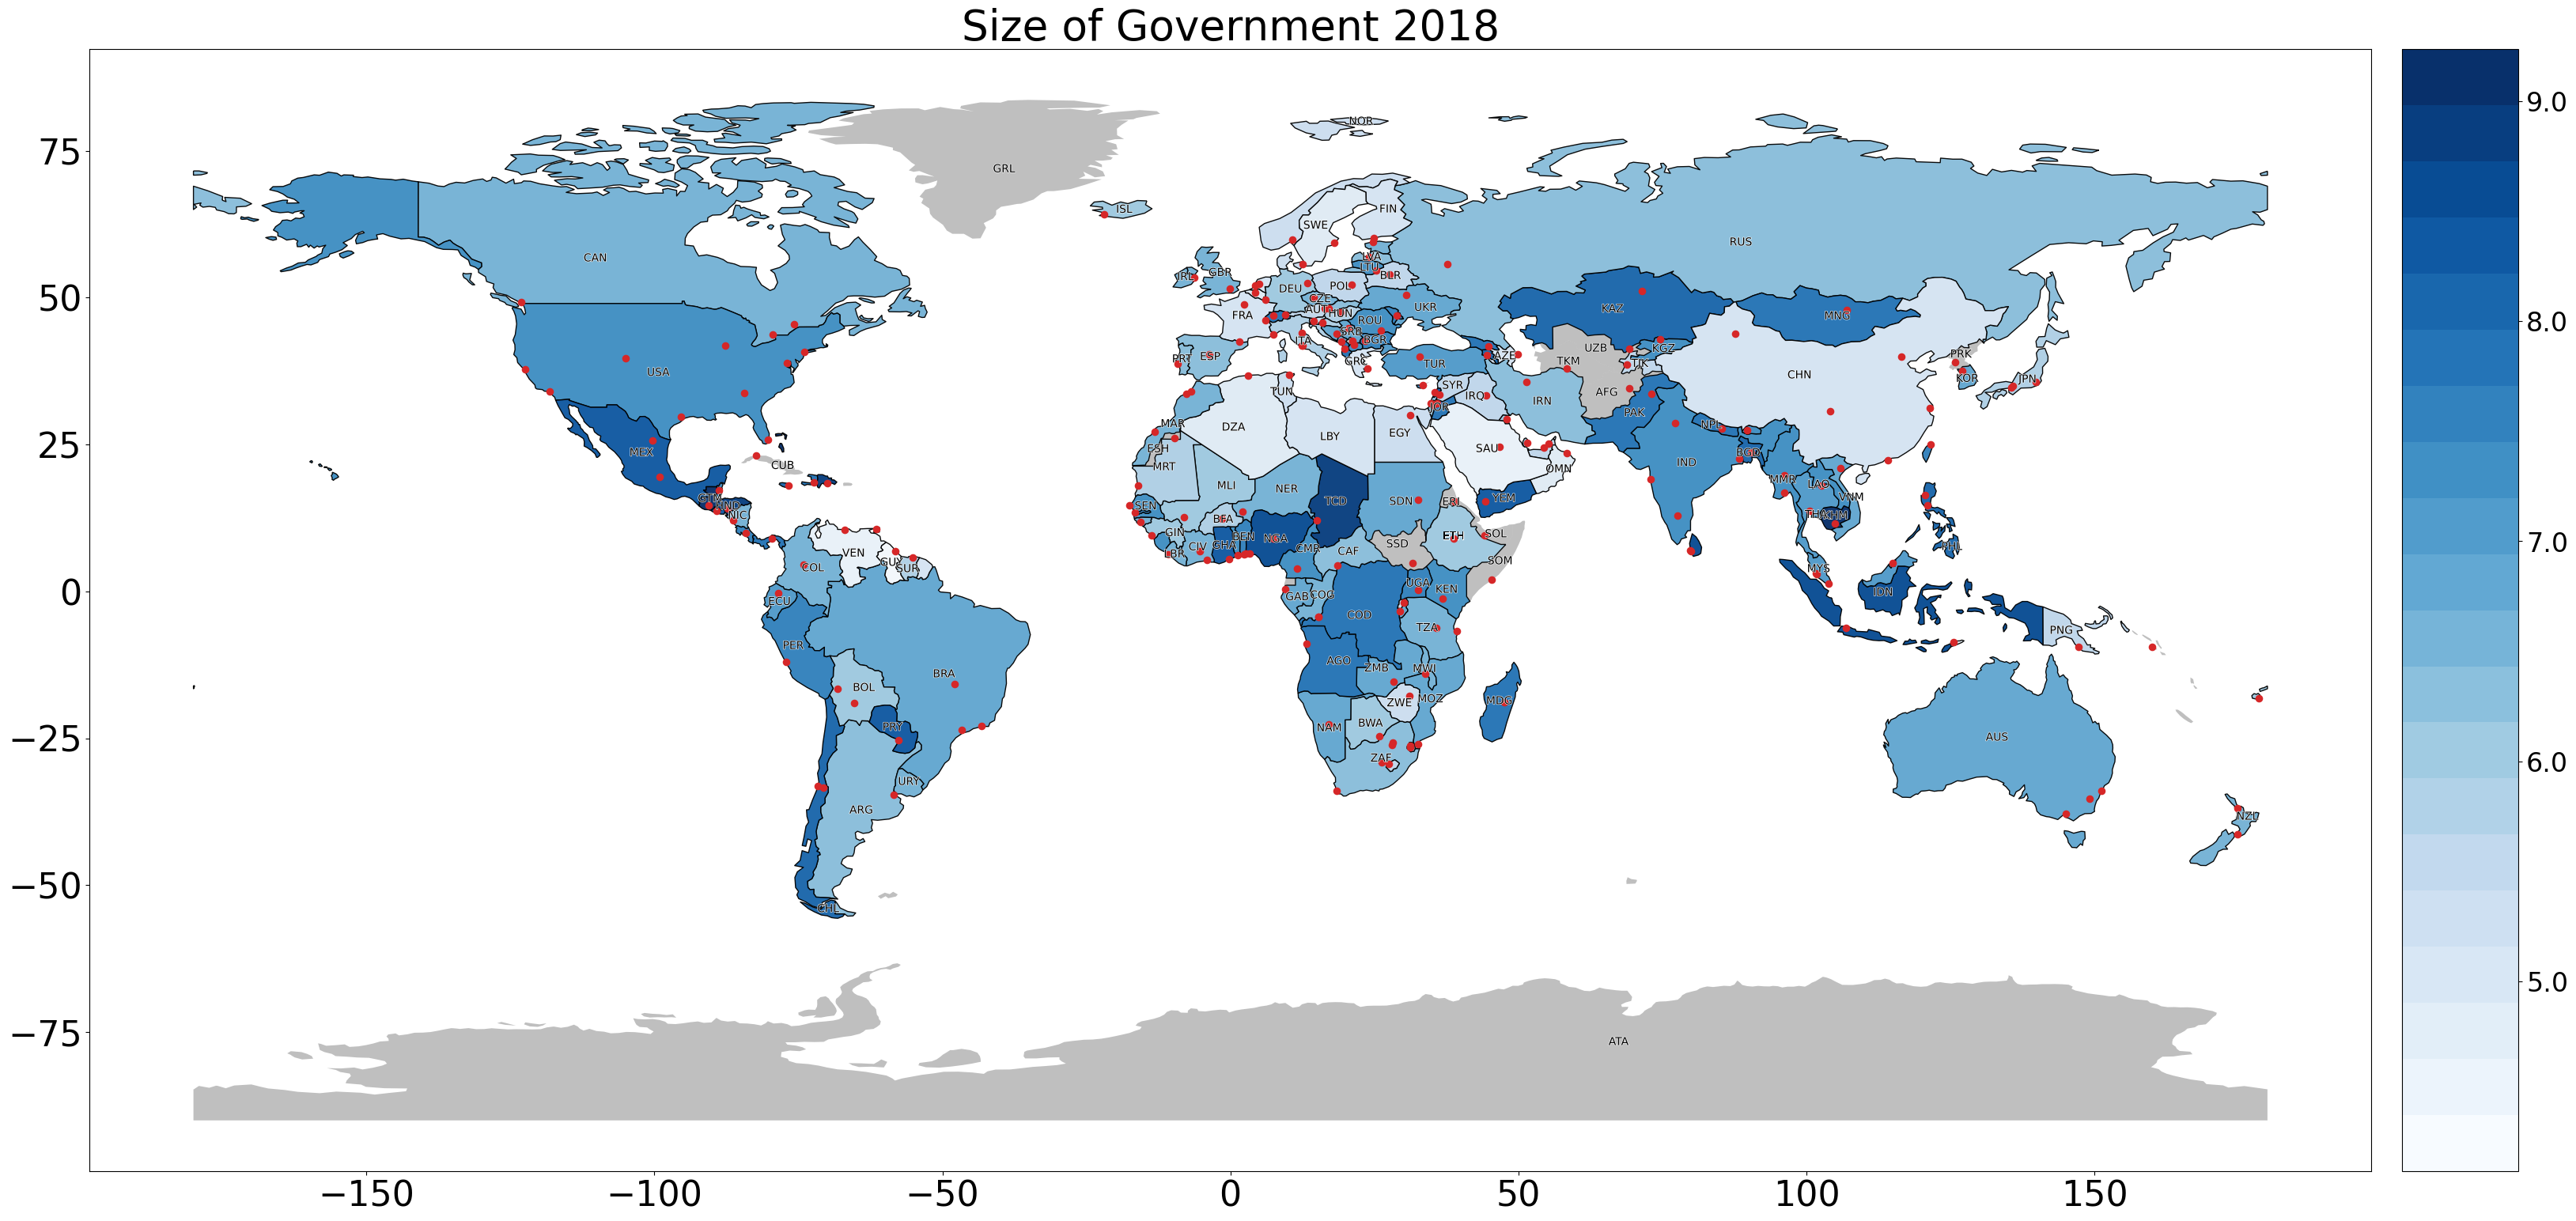

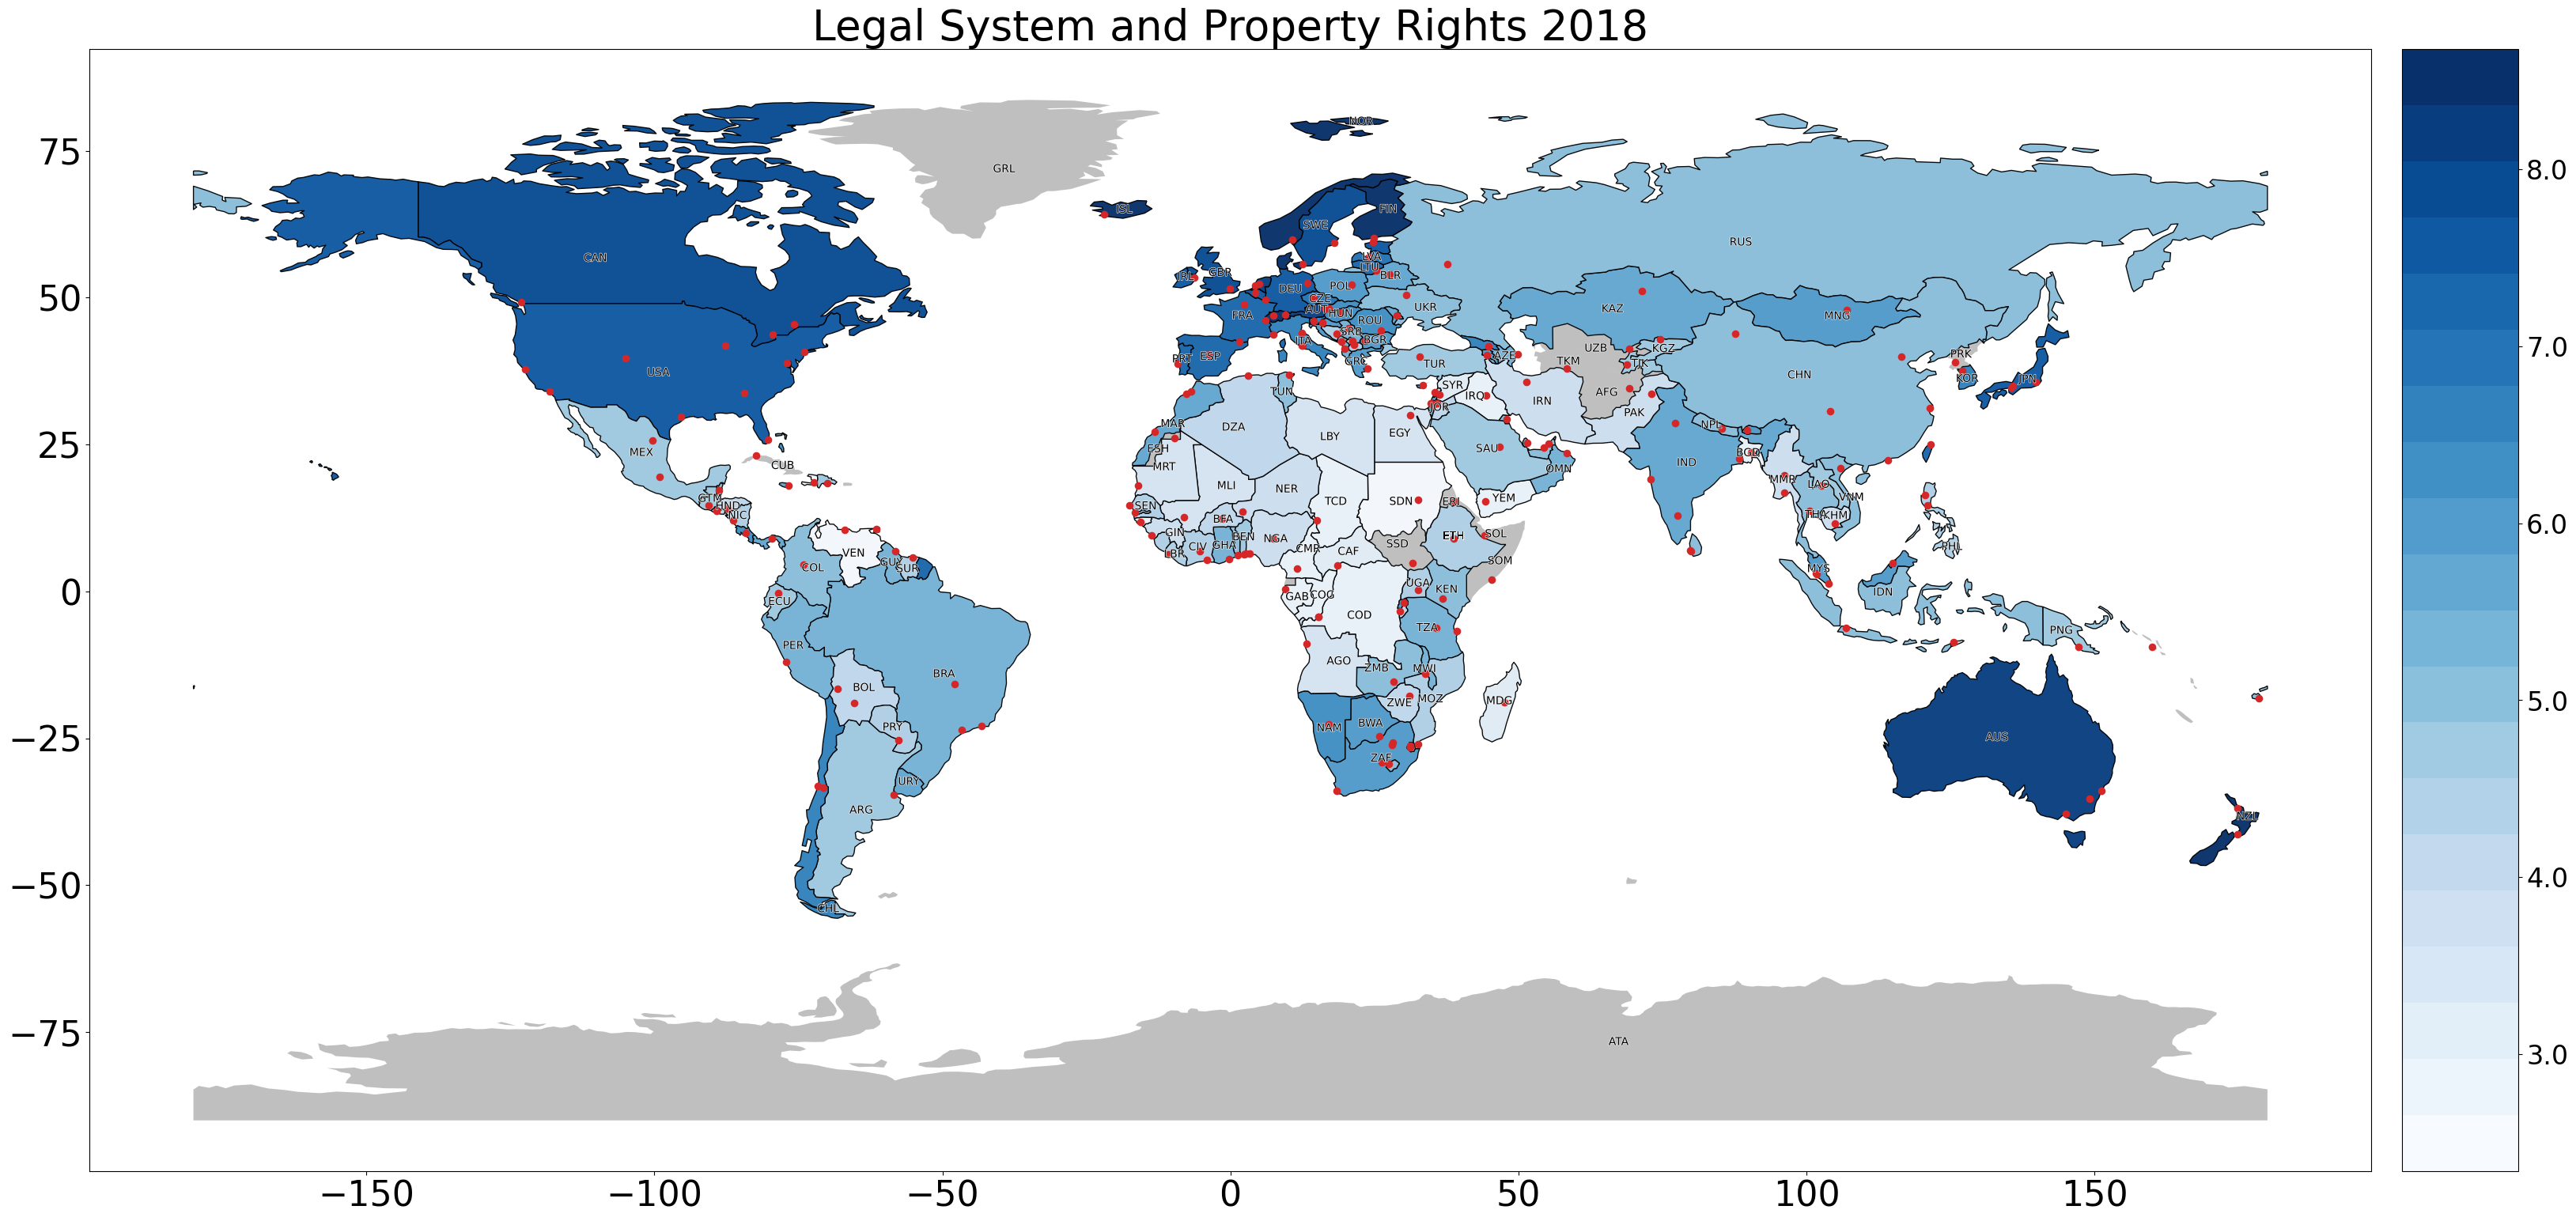

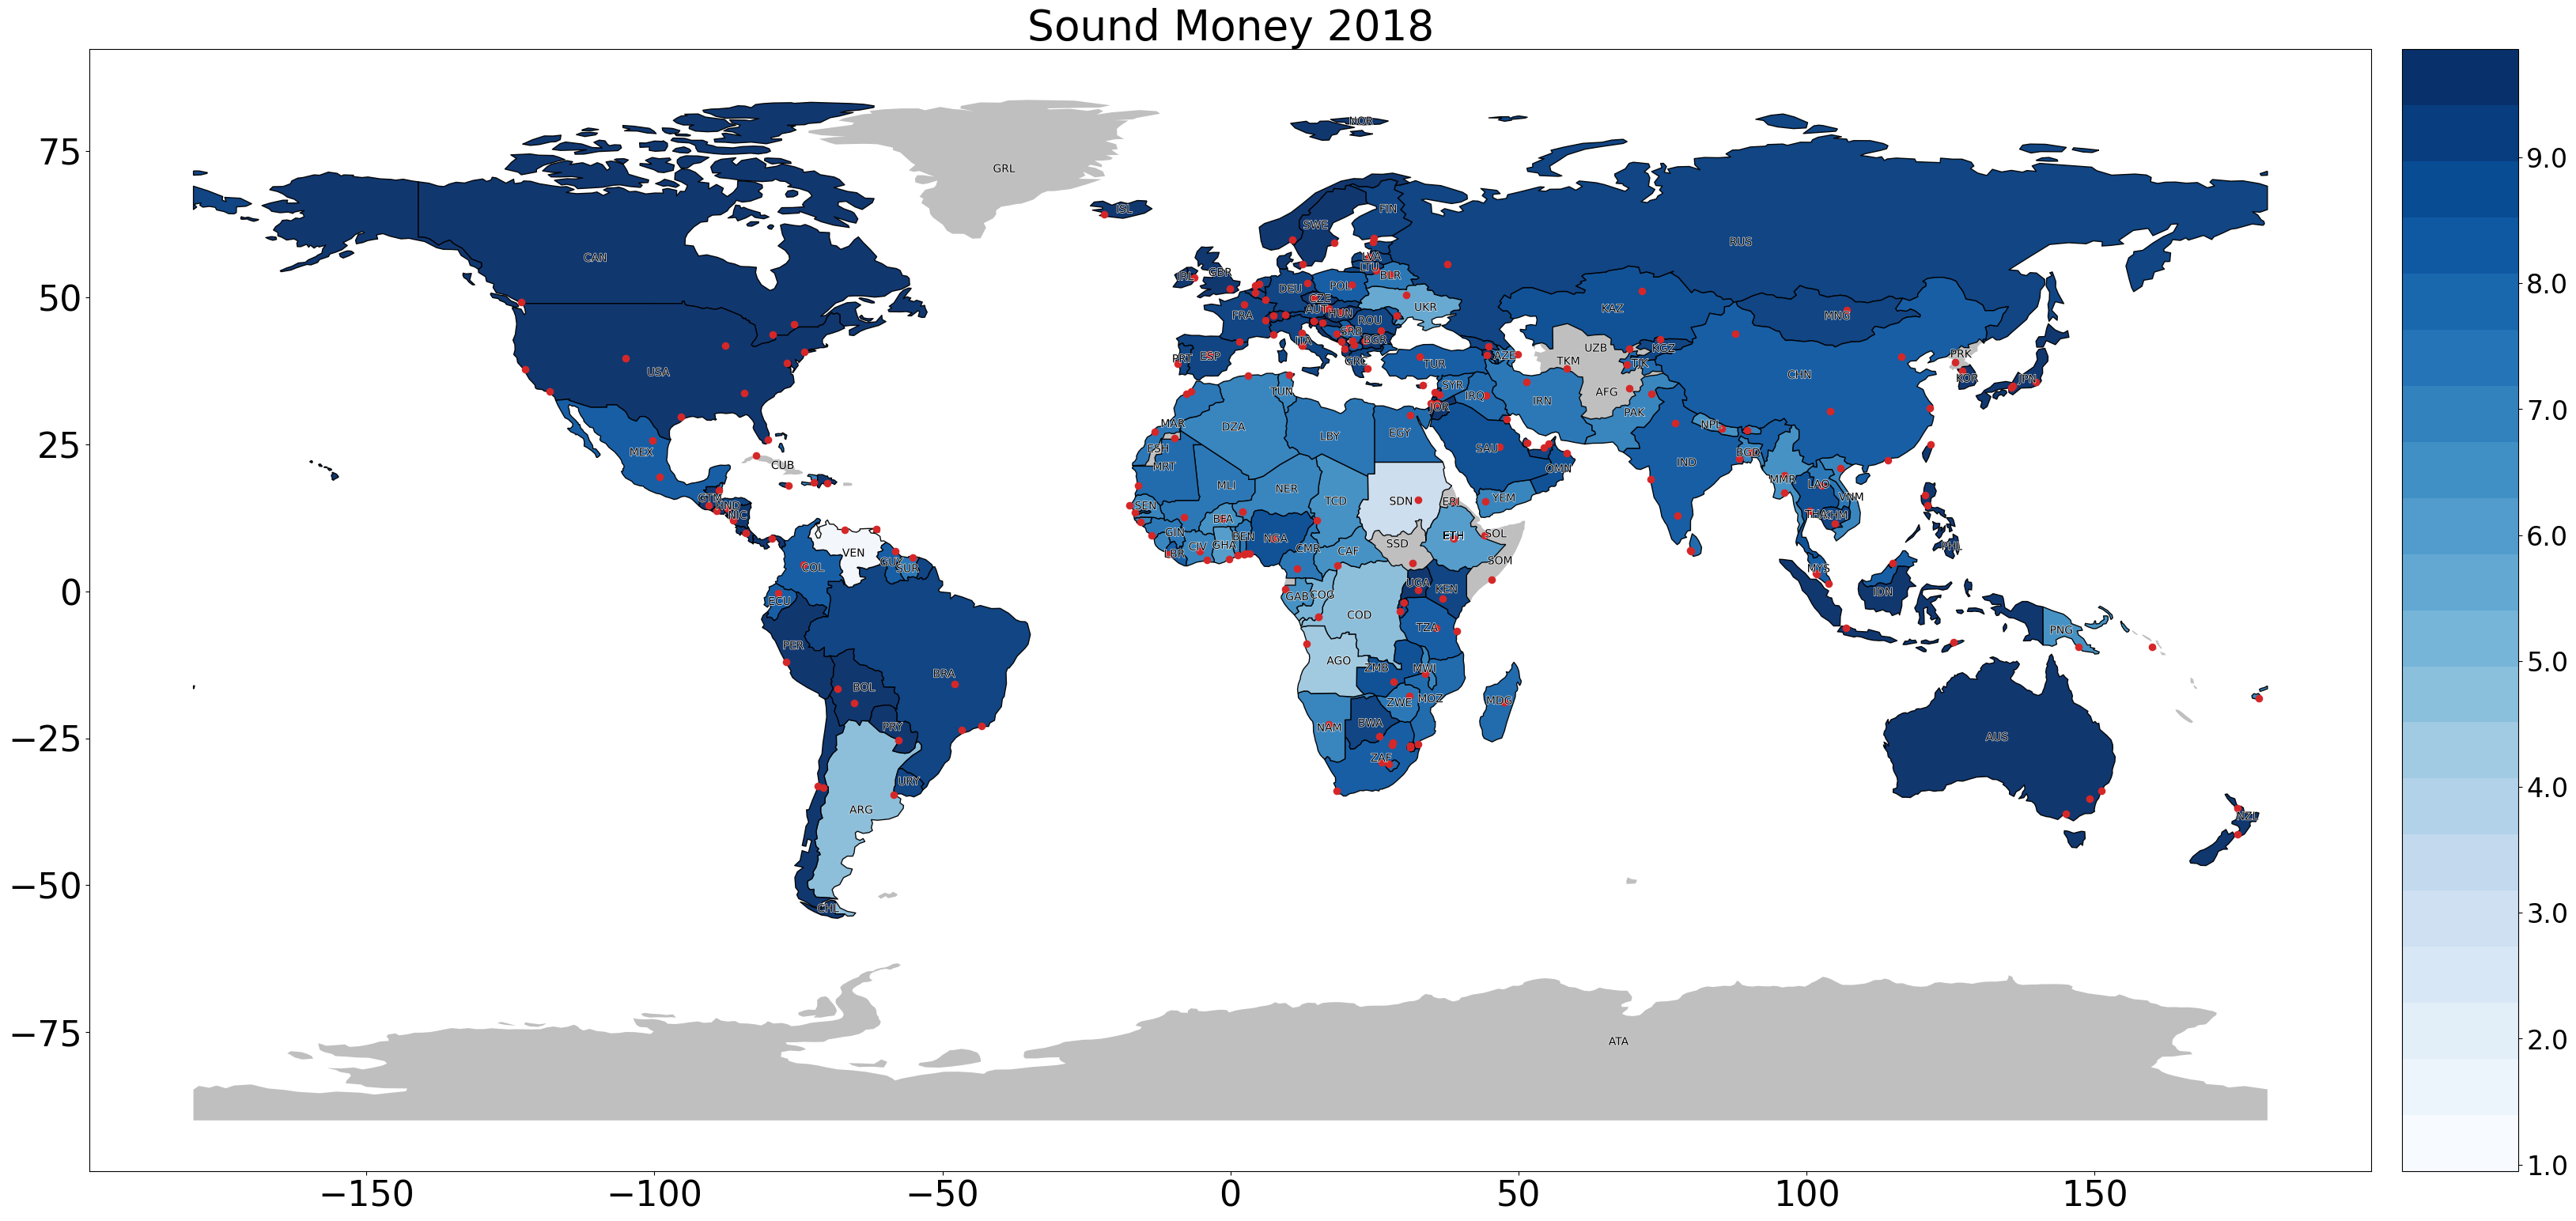

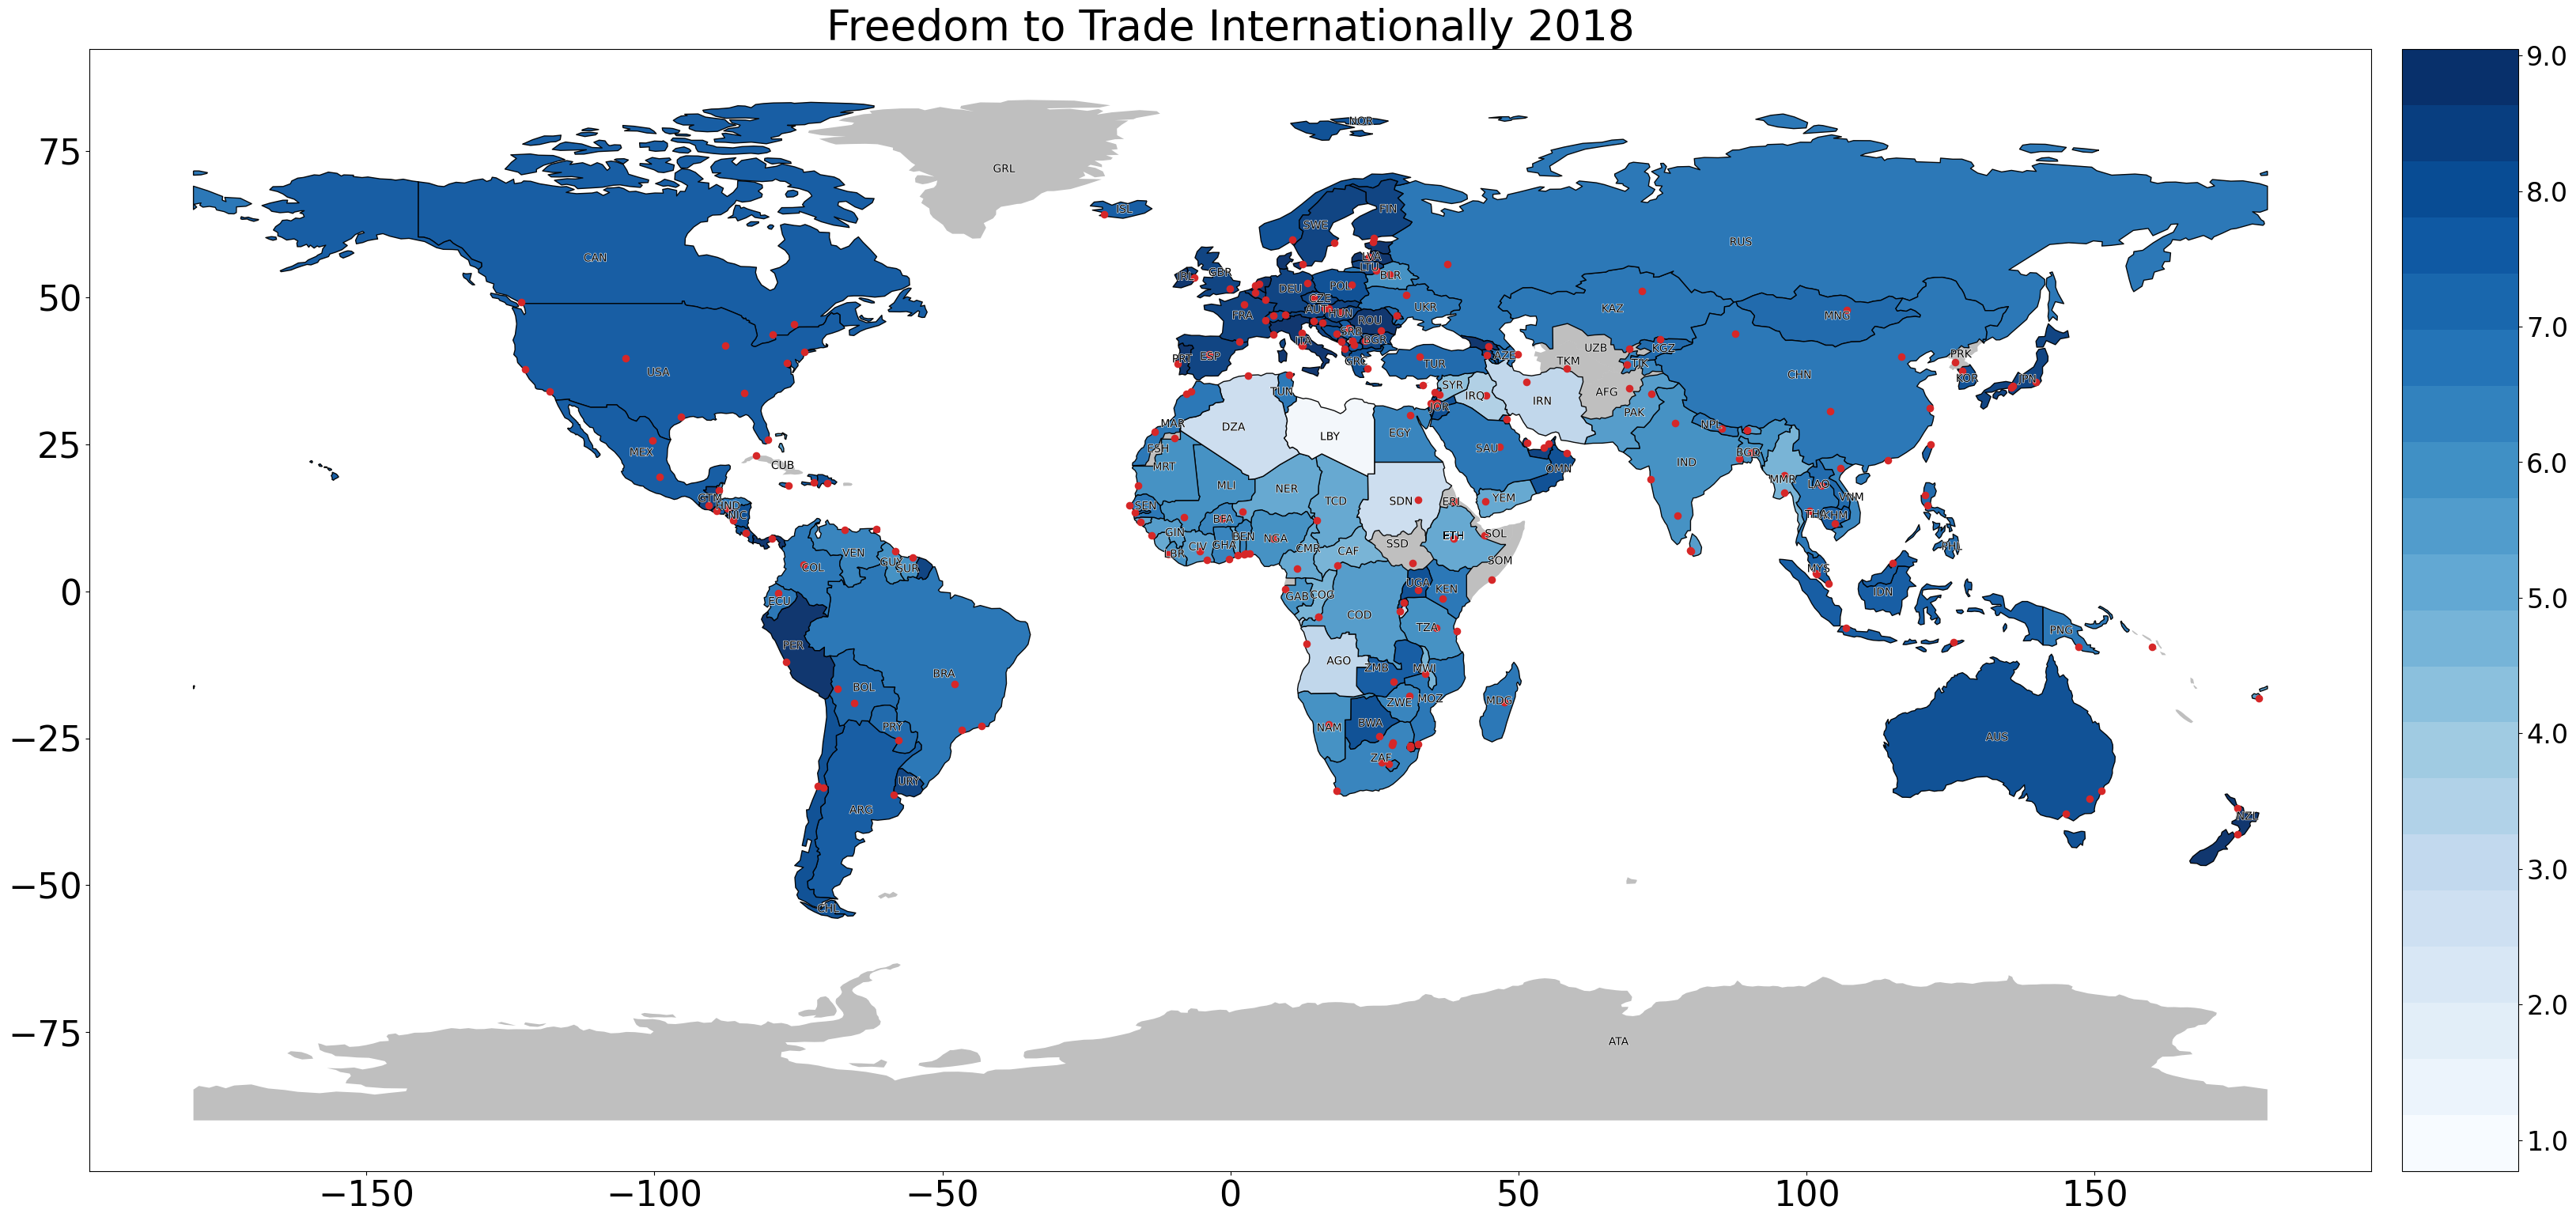

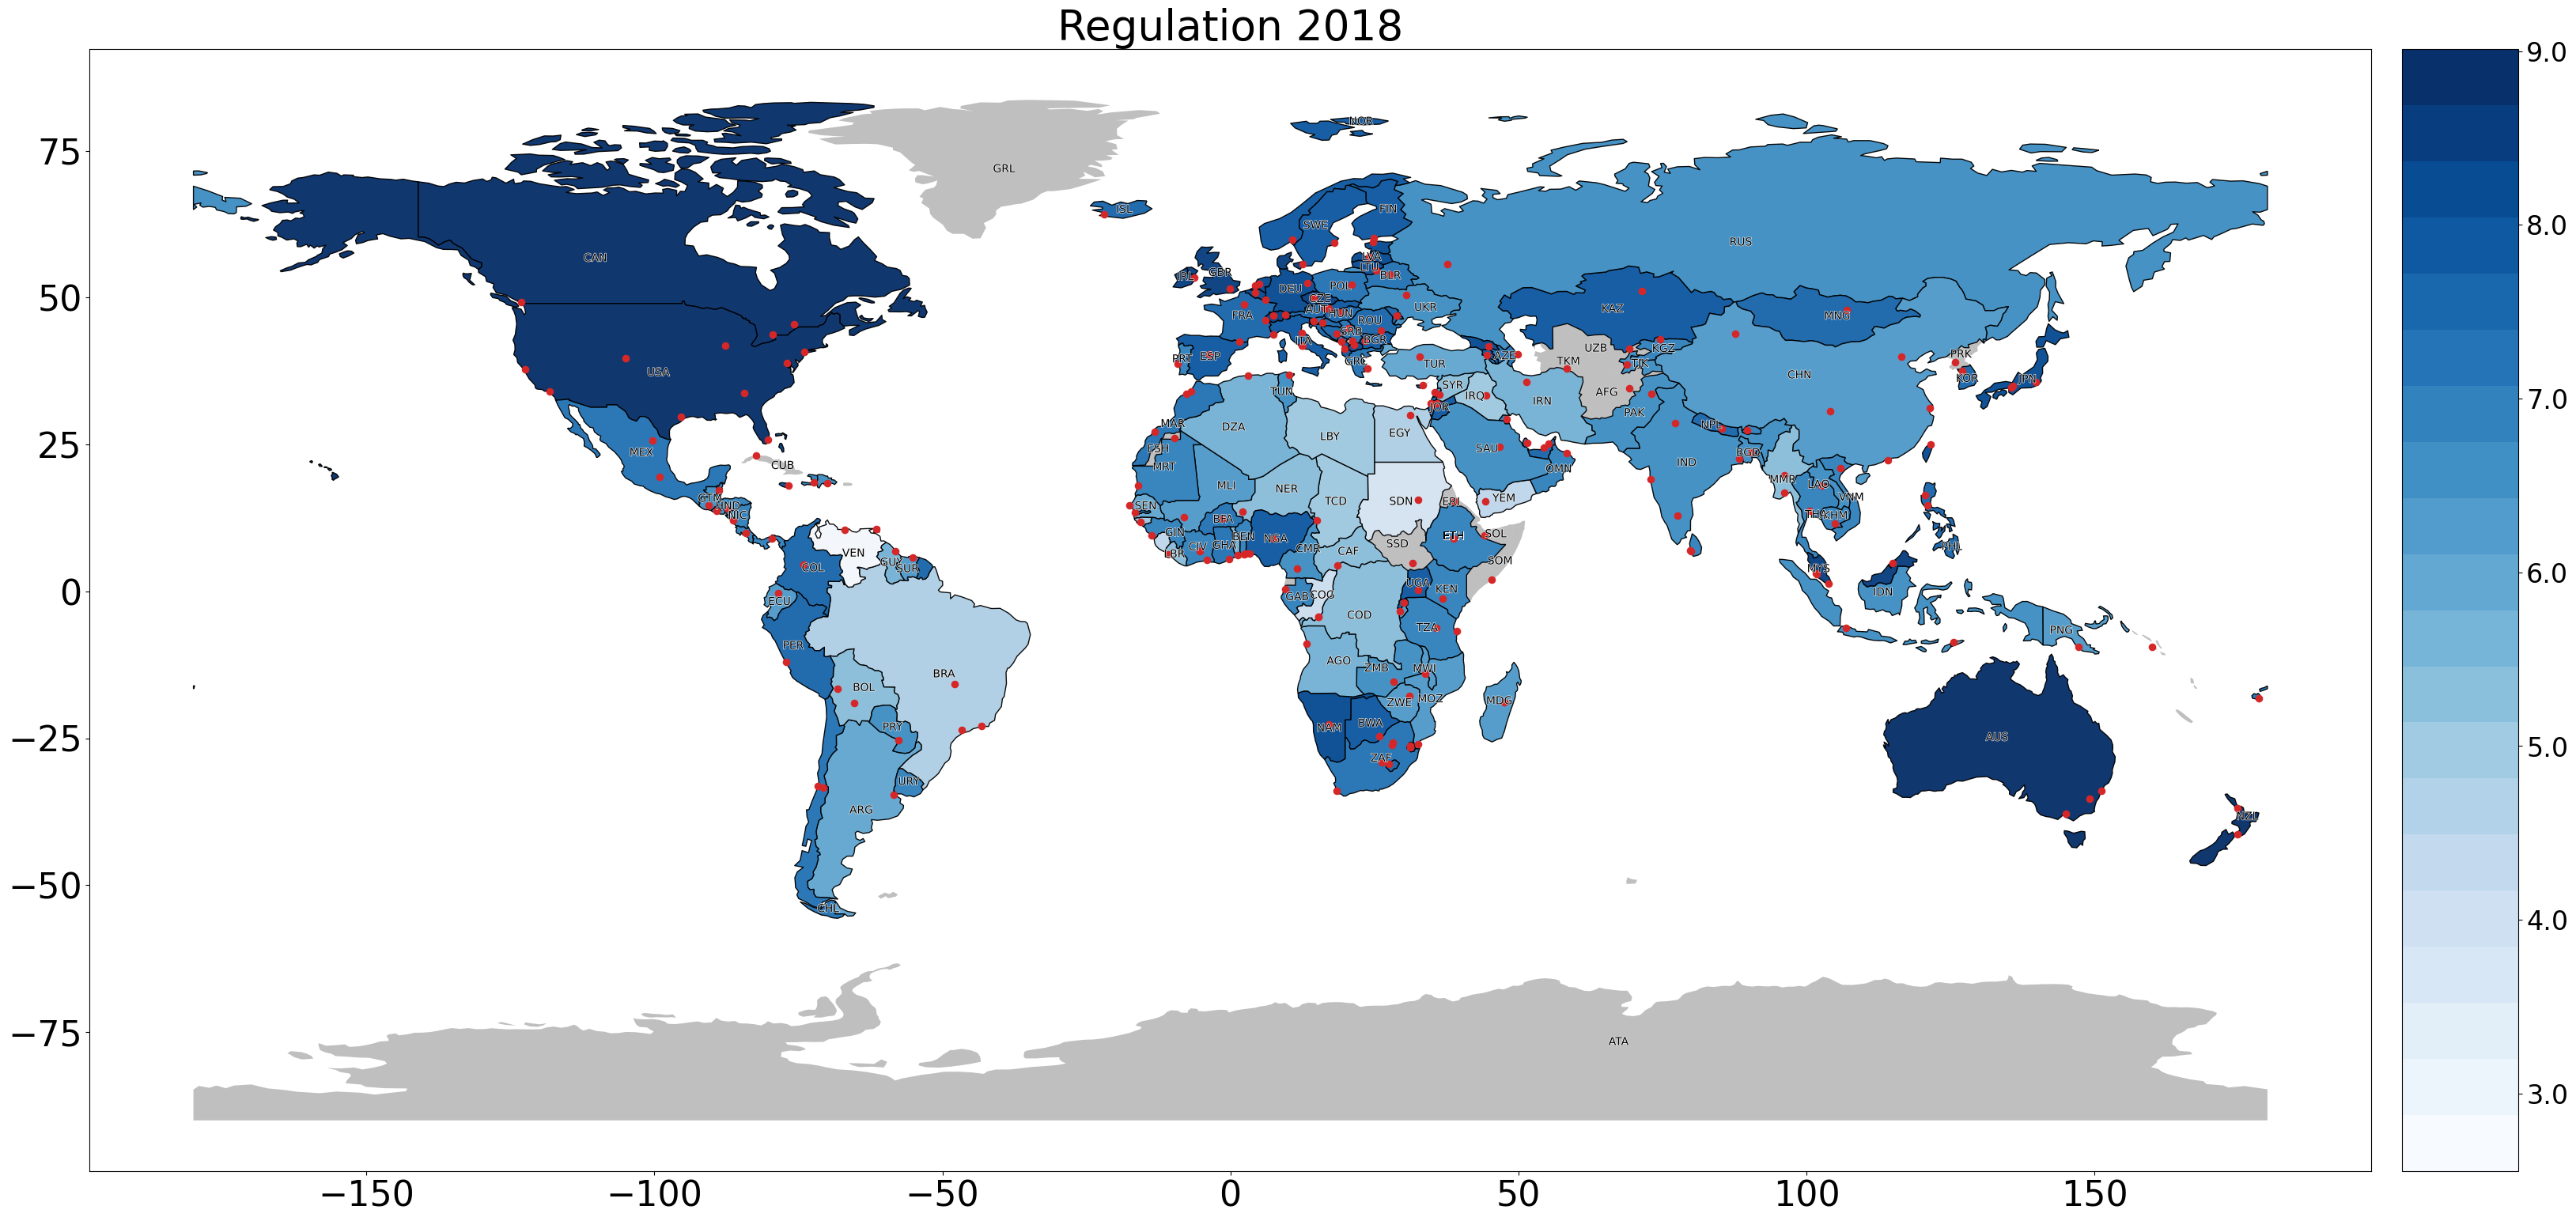

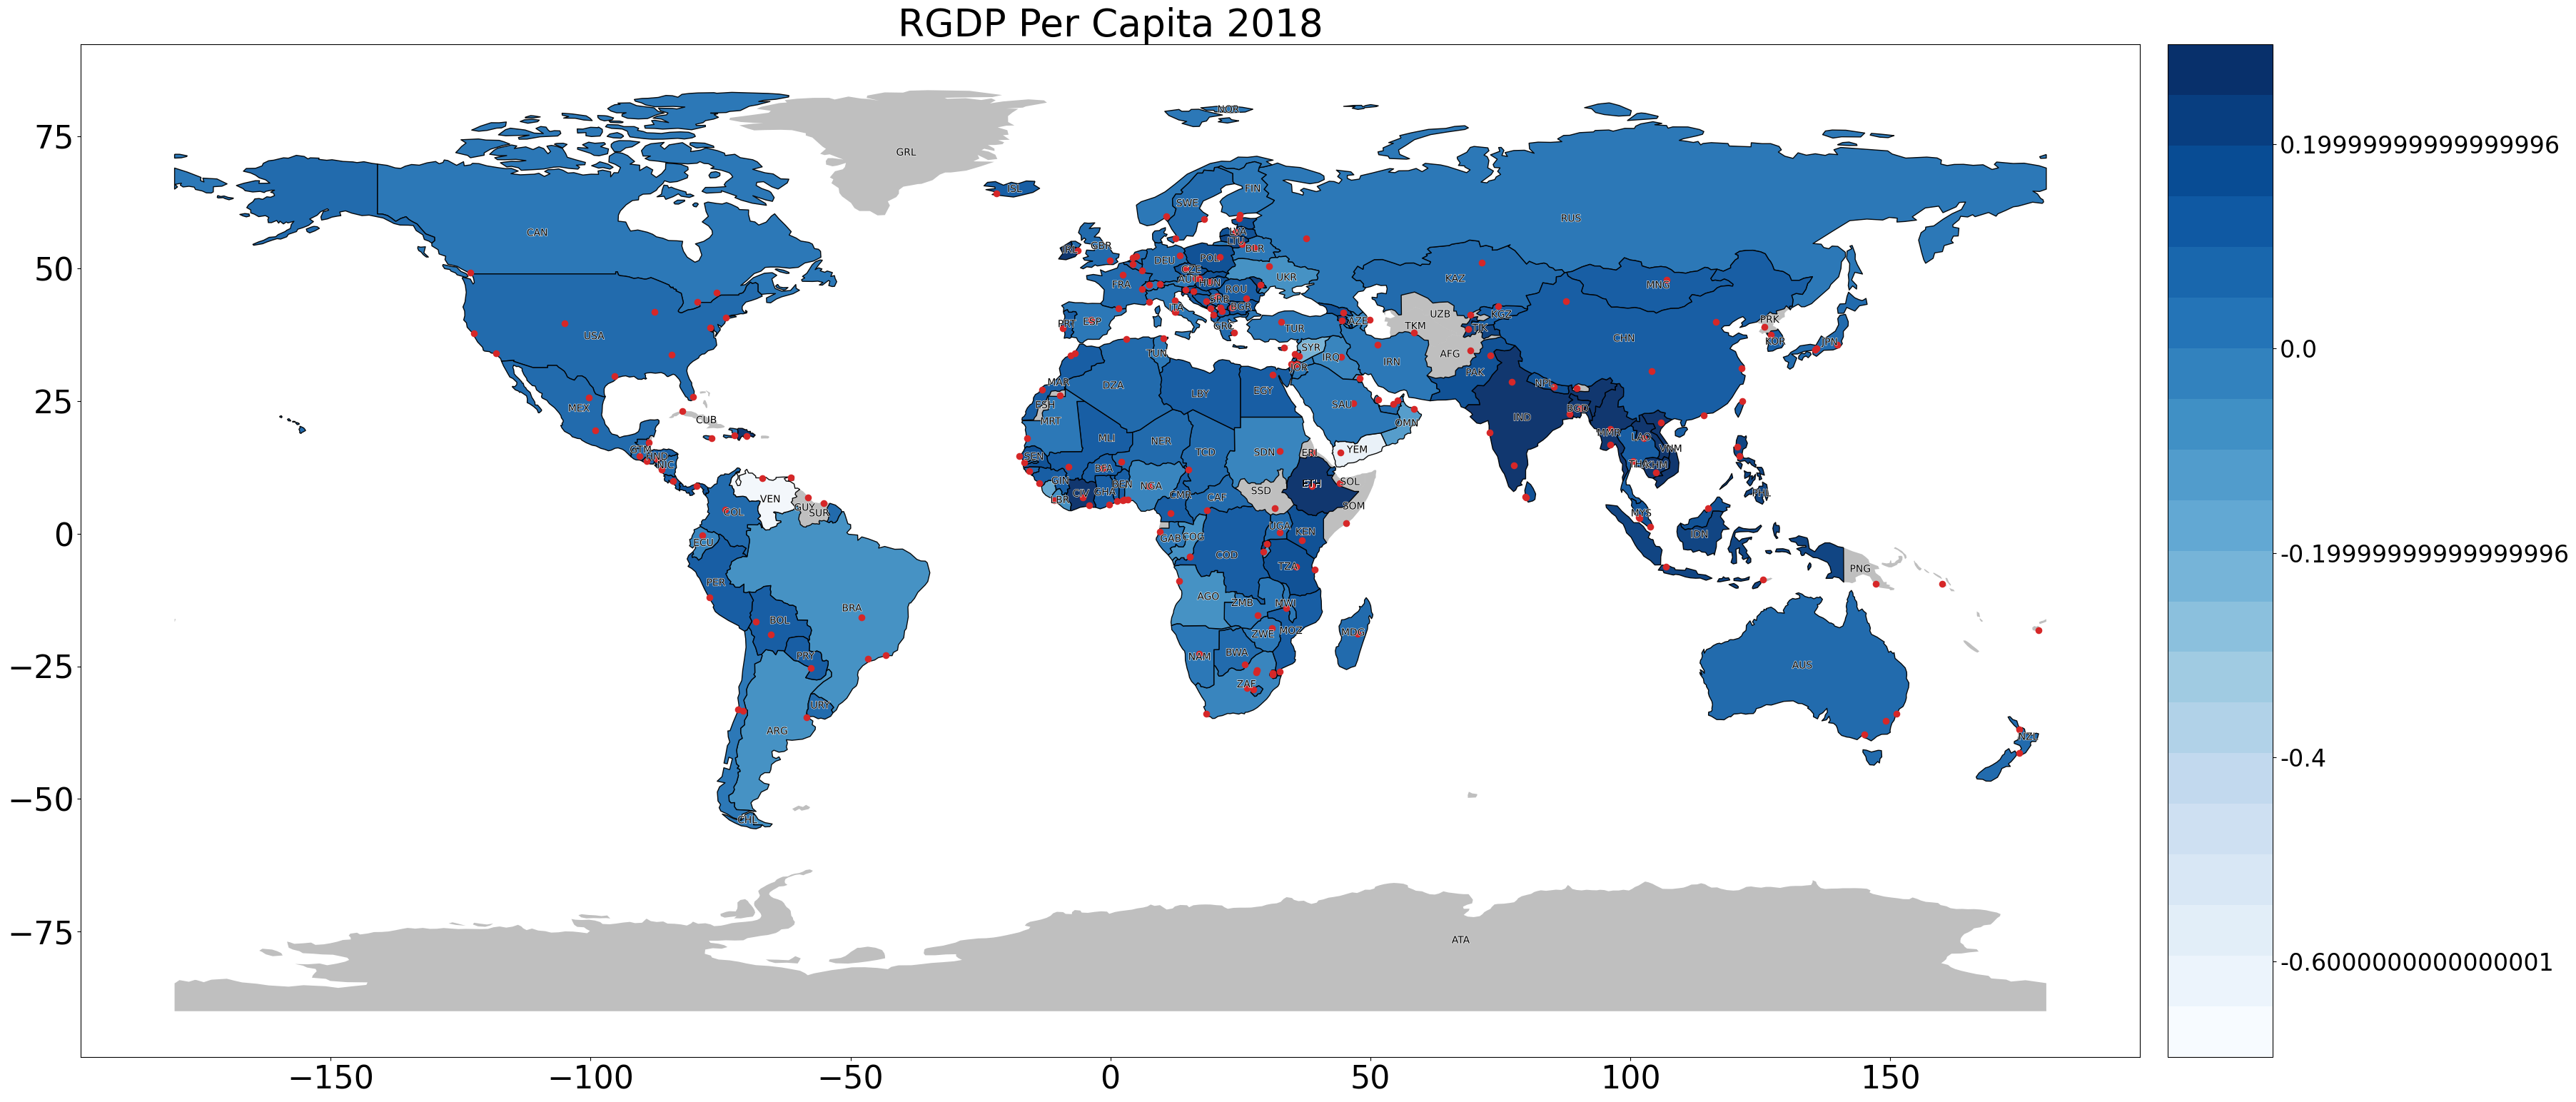

In [25]:
import matplotlib.patheffects as pe
for key in EFW_keys:
    column = key + " 2018"
    fig, ax = plt.subplots(figsize = (40,30))
    cmap = cm.get_cmap("Blues", 20)
    norm = cm.colors.Normalize(vmin = world[column].min(),
                               vmax = world[column].max())
    sm = cm.ScalarMappable(cmap = cmap,
                          norm = norm)
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right",
                             size = size,
                             pad = .1)
    cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
    cbar.ax.tick_params(labelsize = 24)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)
    
    
    world.plot(color = "k", alpha = .25, ax = ax)
    world.plot(column = column,
              cmap = cmap,
               linewidth = 1,
               edgecolor = "k",
              ax = ax,
              alpha = .95)
    cities[cities["Country"]!= ""].plot(color = "C3",
                                       markersize = 35,
                                       ax = ax)
    
    area = world.area
    #add country label only if greater than or equal to size of Ireland
    for ix in world.index:
        if area[ix] >= area["IRL"]:
            centroid = world.loc[ix]["geometry"].representative_point()
            x,y = centroid.x, centroid.y 
            ax.text(x, y, ix, va = "center", 
                    ha = "center", fontsize = 10,
                   path_effects = [pe.withStroke(linewidth = .9, 
                                                 foreground = "white")])
            
    ax.set_title(column)